From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



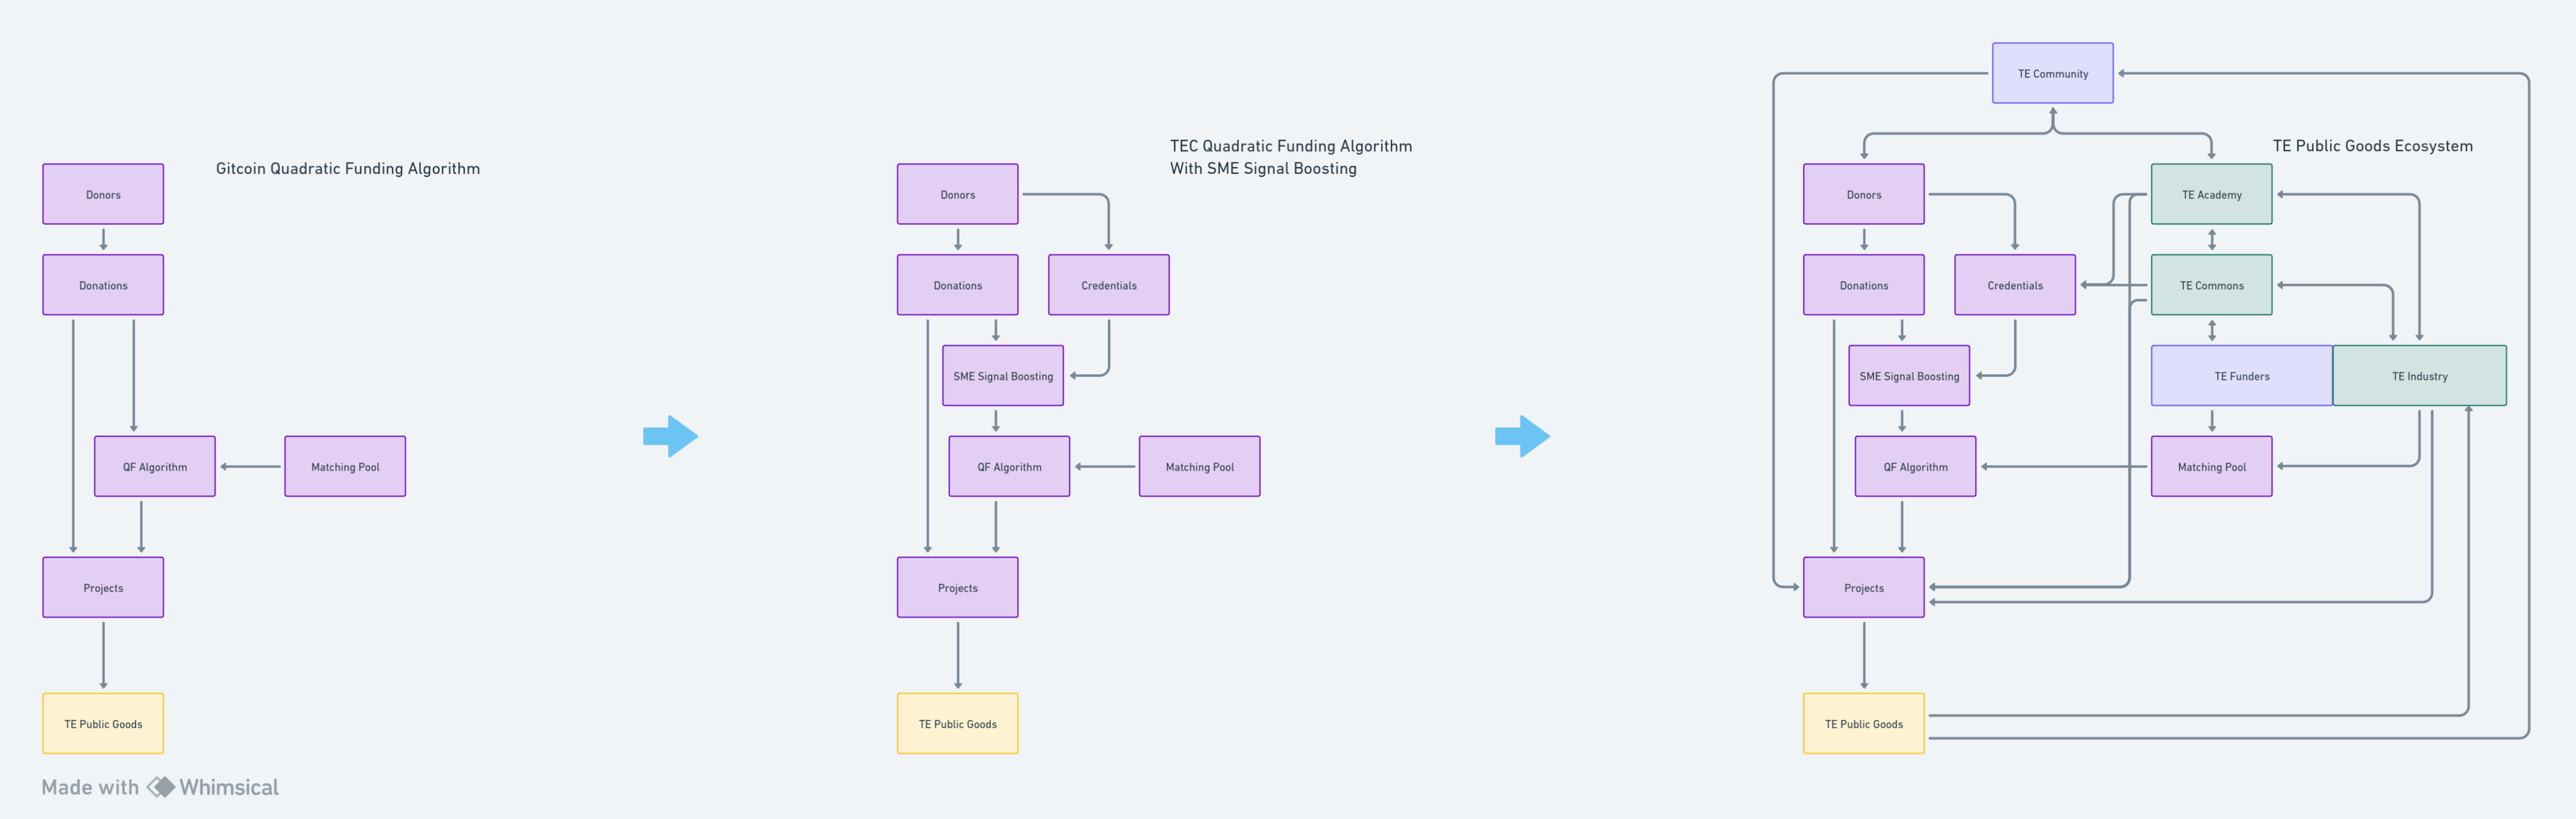![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [2]:
community

array([ 6, 10,  3, 29,  1, 20, 26, 27,  2, 11, 22,  8, 15, 21, 16,  4, 28,
        9,  0, 19, 13, 17, 14,  7, 18, 25,  5, 12])

In [3]:
public_goods

[(0, 26),
 (1, 28),
 (2, 20),
 (3, 0),
 (4, 22),
 (5, 17),
 (6, 14),
 (7, 22),
 (8, 2),
 (9, 14),
 (10, 2),
 (11, 26),
 (12, 0),
 (13, 18),
 (14, 22),
 (15, 29),
 (16, 15),
 (17, 21),
 (18, 16),
 (19, 9),
 (20, 17),
 (21, 20),
 (22, 10),
 (23, 29),
 (24, 8),
 (25, 8)]

In [4]:
len(society)

30

In [5]:
len(community)

28

In [6]:
len(public_goods)

26

## 3.1 Individual Preferences and Actions

### Value Function Generators

The paper calls for 
* Concave, 
* Smooth, 
* Increasing preferences towards the funding of public goods.

The following function generator, generates value functions in the domain of {[0,1],[0,1]}.

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [10]:
concave_function_parameters_generator()

{'f0': 0.1472508256409178,
 'f1': 0.3973283083416508,
 'steepness': 3.1484066382298668}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Visualizing Sampled Value Functions

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=779, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### Value Functions Dataset

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 780)

Make Funding the Index from 0 to 100

In [14]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [15]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [16]:
df_value_functions

value_p_i  ((0, 26), 0)  ((0, 26), 1)  ((0, 26), 2)  ((0, 26), 3)  \
funding                                                             
0.000000       0.143241      0.535633      0.068643      0.274752   
0.002506       0.167947      0.535633      0.073085      0.275229   
0.005013       0.191551      0.535633      0.077493      0.275699   
0.007519       0.214103      0.535633      0.081869      0.276163   
0.010025       0.235648      0.535633      0.086212      0.276619   
...                 ...           ...           ...           ...   
0.989975       0.697221      0.535633      0.633052      0.307709   
0.992481       0.697221      0.535633      0.633282      0.307710   
0.994987       0.697221      0.535633      0.633511      0.307712   
0.997494       0.697221      0.535633      0.633738      0.307713   
1.000000       0.697221      0.535633      0.633964      0.307715   

value_p_i  ((0, 26), 4)  ((0, 26), 5)  ((0, 26), 6)  ((0, 26), 7)  \
funding                                                             
0.000000       0.166111      0.434137      0.600837      0.000000   
0.002506       0.186471      0.434137      0.600837      0.010298   
0.005013       0.206199      0.434137      0.600837      0.020487   
0.007519       0.225314      0.434137      0.600837      0.030571   
0.010025       0.243835      0.434137      0.600837      0.040549   
...                 ...           ...           ...           ...   
0.989975       0.821582      0.434137      0.600837      0.970163   
0.992481       0.821582      0.434137      0.600837      0.970326   
0.994987       0.821582      0.434137      0.600837      0.970487   
0.997494       0.821582      0.434137      0.600837      0.970646   
1.000000       0.821582      0.434137      0.600837      0.970804   

value_p_i  ((0, 26), 8)  ((0, 26), 9)  ...  ((25, 8), 20)  ((25, 8), 21)  \
funding                                ...                                 
0.000000       0.000000      0.440851  ...       0.278431       0.129401   
0.002506       0.002569      0.440851  ...       0.278431       0.129401   
0.005013       0.005059      0.440851  ...       0.278431       0.129401   
0.007519       0.007473      0.440851  ...       0.278431       0.129401   
0.010025       0.009812      0.440851  ...       0.278431       0.129401   
...                 ...           ...  ...            ...            ...   
0.989975       0.083402      0.440851  ...       0.278431       0.129401   
0.992481       0.083402      0.440851  ...       0.278431       0.129401   
0.994987       0.083402      0.440851  ...       0.278431       0.129401   
0.997494       0.083402      0.440851  ...       0.278431       0.129401   
1.000000       0.083402      0.440851  ...       0.278431       0.129401   

value_p_i  ((25, 8), 22)  ((25, 8), 23)  ((25, 8), 24)  ((25, 8), 25)  \
funding                                                                 
0.000000        0.066425       0.000000       0.000000       0.839006   
0.002506        0.097995       0.013964       0.007620       0.839006   
0.005013        0.128269       0.027672       0.015104       0.839006   
0.007519        0.157300       0.041129       0.022456       0.839006   
0.010025        0.185141       0.054338       0.029677       0.839006   
...                  ...            ...            ...            ...   
0.989975        0.835655       0.760289       0.428956       0.839006   
0.992481        0.835655       0.760298       0.428962       0.839006   
0.994987        0.835655       0.760307       0.428968       0.839006   
0.997494        0.835655       0.760316       0.428975       0.839006   
1.000000        0.835655       0.760325       0.428981       0.839006   

value_p_i  ((25, 8), 26)  ((25, 8), 27)  ((25, 8), 28)  ((25, 8), 29)  
funding                                                                
0.000000        0.576049       0.000000       0.000000       0.000000  
0.002506        0.577276       0.001488       0.0

Display Citizen Preferences for Funding.

In [17]:
# Takes rendering time.
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [18]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [19]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Distributions Explorer

In [20]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [21]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        distribution = pd.Series(distribution, name='Public Goods Funding Distribution')
        return distribution / distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=26)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### Saving State with Params

In [22]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 26,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [23]:
dist_gen.generate_distribution()

0     0.031498
1     0.024911
2     0.061091
3     0.009005
4     0.033786
5     0.053494
6     0.031503
7     0.013297
8     0.006933
9     0.013622
10    0.091524
11    0.091524
12    0.043483
13    0.067487
14    0.027503
15    0.008631
16    0.025161
17    0.043292
18    0.015704
19    0.001161
20    0.091524
21    0.015465
22    0.091524
23    0.065798
24    0.002030
25    0.039049
Name: Public Goods Funding Distribution, dtype: float64

#### Public Goods Pareto Distribution

In [24]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [25]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [26]:
generate_public_goods_pareto_distribution = lambda n: pd.Series(generate_pareto(n), name='Public Goods Funding Distribution')
public_goods_funding_distribution = generate_public_goods_pareto_distribution(n=len(public_goods))
public_goods_funding_distribution

0     0.015741
1     0.117868
2     0.268004
3     0.006013
4     0.009926
5     0.022303
6     0.005633
7     0.059187
8     0.004882
9     0.009541
10    0.015888
11    0.005342
12    0.050695
13    0.005982
14    0.000983
15    0.049962
16    0.088510
17    0.005878
18    0.018011
19    0.037461
20    0.012883
21    0.066933
22    0.004885
23    0.084074
24    0.000124
25    0.033290
Name: Public Goods Funding Distribution, dtype: float64

### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [27]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 26
ic|k: 1


In [28]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizin I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=26)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [29]:
len(public_goods)

26

In [30]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [31]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.790396  0.000000  0.000000   
2            0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
3            0.000000  0.181622  0.094130  0.003319  0.025505  0.000000   
4            0.000000  0.000000  0.646161  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.088924  0.000000  0.000000  0.000000  0.000000   
8            0.362650  0.000000  0.000000  0.000000  0.000000  0.054869   
9            0.000000  0.016079  0.056192  0.000000  0.227183  0.001901   
10           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
12           0.134735  0.000000  0.000000  0.229556  0.121126  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.313570  0.000000  0.000000  0.000000  0.082731  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.049187  0.000000  0.252478  0.000000  0.057586   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.312829  0.181978  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.669559  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.073968  0.085146  0.000000  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.000000  0.032197  0.000000  0.028752  0.000000  0.055961   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        16        17  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  1.000000   
1            0.000000  0.000000  0.000000  0.008389  ...  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3            0.000000  0.032337  0.080183  0.000000  ...  0.116099  0.039651   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
7            0.000000  0.022762  0.000000  0.128821  ...  0.000000  0.000000   
8            0.000000  0.000000  0.099856  0.000000  ...  0.000000  0.000000   
9            0.000000  0.000000  0.000000  0.146657  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.053381  0.240896  ...  0.000000  0.000000   
13           0.657542  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
14           0.143679  0.000000  0.000000  0.000000  ...  0.181460  0.000000   
15           0.000000  0.000000  0.635906  0.000000  ...  0.000000  0.291801   
16           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.102017  0.000000  0.022586  0.000000  ...  0.000000  0.032947   

In [32]:
contributions.sum()

Public Good
0     0.810955
1     0.754806
2     1.063606
3     3.974061
4     0.456545
5     1.170317
6     2.416540
7     1.974092
8     0.982428
9     0.857509
10    0.322487
11    0.931900
12    0.486962
13    1.111200
14    1.660792
15    1.848767
16    0.497883
17    1.550436
18    0.728687
19    0.815522
20    1.147019
21    0.694164
22    1.101703
23    0.702346
24    1.001894
25    0.937379
dtype: float64

In [33]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [34]:
contributions.sum().sum()

30.000000000000004

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [35]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [36]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [37]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
dtype: float64

In [38]:
public_goods_funding.sum(axis=1)

Citizen
0     0.644980
1     0.329828
2     0.251632
3     1.151107
4     1.093104
5     0.854469
6     0.540901
7     1.067547
8     1.060796
9     1.816592
10    0.602122
11    0.251632
12    0.998224
13    0.765439
14    1.259776
15    0.913062
16    0.998109
17    1.182029
18    1.185218
19    1.169675
20    0.762327
21    0.413815
22    1.027227
23    0.871825
24    0.899928
25    1.146399
26    0.499049
27    0.530396
28    0.506562
29    1.206231
dtype: float64

In [39]:
public_goods_funding.sum().sum()

26.0

In [40]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [41]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [42]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [43]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [44]:
normalized_contributions.sum(axis=0)

Public Good
0     0.015741
1     0.117868
2     0.268004
3     0.006013
4     0.009926
5     0.022303
6     0.005633
7     0.059187
8     0.004882
9     0.009541
10    0.015888
11    0.005342
12    0.050695
13    0.005982
14    0.000983
15    0.049962
16    0.088510
17    0.005878
18    0.018011
19    0.037461
20    0.012883
21    0.066933
22    0.004885
23    0.084074
24    0.000124
25    0.033290
dtype: float64

#### The Normalized Citizen Cost Distribution

In [45]:
normalized_contributions.sum(axis=1)

Citizen
0     0.003791
1     0.001408
2     0.001513
3     0.079413
4     0.171563
5     0.019057
6     0.027025
7     0.049098
8     0.013030
9     0.059398
10    0.000592
11    0.001513
12    0.015376
13    0.034554
14    0.043784
15    0.004681
16    0.000124
17    0.032408
18    0.060620
19    0.110297
20    0.028754
21    0.002331
22    0.045828
23    0.011232
24    0.005383
25    0.076229
26    0.027742
27    0.008920
28    0.029982
29    0.034353
dtype: float64

In [46]:
normalized_contributions.sum().sum()

1.0

### The Total Utility of Citizens

#### Value Functions Dataset Revisited

Melting preferences to get groupby on public good or on citizen.

In [47]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

value_p_i     value public_good citizen
funding                                              
0.000000   ((0, 26), 0)  0.143241     (0, 26)       0
0.002506   ((0, 26), 0)  0.167947     (0, 26)       0
0.005013   ((0, 26), 0)  0.191551     (0, 26)       0
0.007519   ((0, 26), 0)  0.214103     (0, 26)       0
0.010025   ((0, 26), 0)  0.235648     (0, 26)       0
...                 ...       ...         ...     ...
0.989975  ((25, 8), 29)  0.181334     (25, 8)      29
0.992481  ((25, 8), 29)  0.181494     (25, 8)      29
0.994987  ((25, 8), 29)  0.181653     (25, 8)      29
0.997494  ((25, 8), 29)  0.181812     (25, 8)      29
1.000000  ((25, 8), 29)  0.181970     (25, 8)      29

[312000 rows x 4 columns]

Groupby funding and public good to get mean funding preferences per public good.

Display mean value function per public good.

In [48]:
df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index().hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [49]:
df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index().hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Value per Citizen as Public Goods are Funded')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Total value per public good given funding.

In [50]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good    (0, 26)    (1, 28)    (10, 2)   (11, 26)    (12, 0)   (13, 18)  \
funding                                                                         
0.000000      6.183884   5.753731   4.785445   3.845427   5.090594   5.147834   
0.002506      6.443413   6.091287   5.012544   4.126037   5.315628   5.443453   
0.005013      6.694344   6.418210   5.234255   4.397610   5.533886   5.729334   
0.007519      6.936989   6.734865   5.450725   4.660490   5.745593   6.005845   
0.010025      7.171648   7.041604   5.662096   4.915007   5.950967   6.273339   
...                ...        ...        ...        ...        ...        ...   
0.989975     15.601752  18.357107  16.161047  15.524532  14.270523  17.570822   
0.992481     15.602477  18.357889  16.162067  15.525953  14.271596  17.573578   
0.994987     15.603197  18.358665  16.163079  15.527364  14.272662  17.576319   
0.997494     15.603911  18.359435  16.164083  15.528765  14.273720  17.579046   
1.000000     15.604621  18.360199  16.165079  15.530157  14.274771  17.581758   

public_good   (14, 22)   (15, 29)   (16, 15)   (17, 21)  ...   (23, 29)  \
funding                                                  ...              
0.000000      4.898761   6.550859   3.824702   6.410713  ...   6.598865   
0.002506      5.150539   6.841884   4.074869   6.731650  ...   6.801061   
0.005013      5.394211   7.122705   4.318082   7.041413  ...   6.997434   
0.007519      5.630072   7.393720   4.554574   7.340440  ...   7.188182   
0.010025      5.858403   7.655312   4.784565   7.629151  ...   7.373495   
...                ...        ...        ...        ...  ...        ...   
0.989975     14.486020  17.253054  16.277629  18.690486  ...  15.401194   
0.992481     14.486765  17.254273  16.280490  18.693042  ...  15.402146   
0.994987     14.487504  17.255483  16.283336  18.695586  ...  15.403092   
0.997494     14.488238  17.256685  16.286168  18.698120  ...  15.404032   
1.000000     14.488967  17.257879  16.288985  18.700643  ...  15.404968   

public_good    (24, 8)    (25, 8)     (3, 0)    (4, 22)    (5, 17)    (6, 14)  \
funding                                                                         
0.000000      4.446404   4.966131   6.069615   4.723968   4.127439   4.397534   
0.002506      4.819379   5.194989   6.345803   5.051370   4.430563   4.676822   
0.005013      5.180575   5.416966   6.612441   5.366778   4.724561   4.946166   
0.007519      5.530404   5.632295   6.869892   5.670669   5.009745   5.205955   
0.010025      5.869260   5.841206   7.118505   5.963504   5.286418   5.456560   
...                ...        ...        ...        ...        ...        ...   
0.989975     19.072053  14.637996  16.345903  15.590844  16.856787  13.840561   
0.992481     19.073898  14.639680  16.347996  15.591595  16.858629  13.841275   
0.994987     19.075731  14.641357  16.350079  15.592340  16.860462  13.841983   
0.997494     19.077553  14.643027  16.352153  15.593078  16.862285  13.842687   
1.000000     19.079363  14.644690  16.354219  15.593811  16.864097  13.843386   

public_good    (7, 22)     (8, 2)    (9, 14)  
funding                                       
0.000000      5.344324   5.130208   7.158905  
0.002506      5.584910   5.393603   7.404789  
0.005013      5.817163   5.649041   7.642038  
0.007519      6.041408   5.896792   7.870986  
0.010025      6.257953   6.137117   8.091955  
...                ...        ...        ...  
0.989975     13.870319  15.571299  16.287791  
0.992481     13.870704  15.572161  16.290110  
0.994987     13.871086  15.573018  16.292420  
0.997494     13.871464  15.573871  16.294722  
1.000000     13.871838  15.574718  16.297015  

[400 rows x 26 columns]

Total value per citizen per funding of public goods.

In [51]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen           0          1         10         11         12         13  \
funding                                                                      
0.000000   4.853411   4.216771   4.416963   6.547971   5.155519   5.618014   
0.002506   5.090007   4.472818   4.613816   6.760176   5.391910   5.825799   
0.005013   5.318598   4.719693   4.804202   6.965414   5.620715   6.026529   
0.007519   5.539484   4.957750   4.988363   7.163946   5.842203   6.220477   
0.010025   5.752952   5.187330   5.166532   7.356022   6.056634   6.407906   
...             ...        ...        ...        ...        ...        ...   
0.989975  13.396624  12.828289  12.623060  14.570513  14.302421  13.643723   
0.992481  13.397536  12.829167  12.624766  14.570935  14.303404  13.644497   
0.994987  13.398443  12.830039  12.626462  14.571353  14.304381  13.645265   
0.997494  13.399345  12.830905  12.628150  14.571767  14.305351  13.646026   
1.000000  13.400242  12.831766  12.629828  14.572177  14.306315  13.646781   

citizen          14         15         16         17  ...         27  \
funding                                               ...              
0.000000   2.953312   4.069465   5.514256   4.582531  ...   4.499318   
0.002506   3.167602   4.323654   5.660098   4.857083  ...   4.730491   
0.005013   3.375552   4.569908   5.801962   5.122659  ...   4.954439   
0.007519   3.577377   4.808502   5.939980   5.379601  ...   5.171418   
0.010025   3.773282   5.039696   6.074278   5.628237  ...   5.381674   
...             ...        ...        ...        ...  ...        ...   
0.989975  11.955774  13.306216  13.266456  16.443423  ...  14.071744   
0.992481  11.956807  13.306395  13.268864  16.445948  ...  14.073507   
0.994987  11.957833  13.306572  13.271259  16.448460  ...  14.075262   
0.997494  11.958852  13.306748  13.273642  16.450959  ...  14.077008   
1.000000  11.959866  13.306922  13.276014  16.453444  ...  14.078745   

citizen          28         29          3          4          5          6  \
funding                                                                      
0.000000   4.231999   5.506678   4.833058   4.512568   4.440479   5.671526   
0.002506   4.481265   5.758051   5.081559   4.733762   4.649958   5.939719   
0.005013   4.721936   6.001626   5.321724   4.948627   4.853077   6.198396   
0.007519   4.954340   6.237665   5.553863   5.157382   5.050051   6.447919   
0.010025   5.178789   6.466419   5.778273   5.360239   5.241083   6.688635   
...             ...        ...        ...        ...        ...        ...   
0.989975  13.211536  14.821004  13.406299  15.696669  12.329386  15.665947   
0.992481  13.212989  14.821760  13.406579  15.699952  12.329770  15.669217   
0.994987  13.214436  14.822511  13.406857  15.703219  12.330152  15.672475   
0.997494  13.215876  14.823258  13.407132  15.706471  12.330531  15.675721   
1.000000  13.217310  14.824001  13.407405  15.709708  12.330908  15.678955   

citizen           7          8          9  
funding                                    
0.000000   4.070895   3.980879   4.675265  
0.002506   4.275823   4.161295   4.998486  
0.005013   4.474484   4.337898   5.310051  
0.007519   4.667102   4.510775   5.610413  
0.010025   4.853891   4.680009   5.900006  
...             ...        ...        ...  
0.989975  13.084024  13.207160  15.090306  
0.992481  13.085701  13.207502  15.090666  
0.994987  13.087369  13.207841  15.091023  
0.997494  13.089029  13.208175  15.091376  
1.000000  13.090680  13.208506  15.091725  

[400 rows x 30 columns]

#### The Value Tensor

In [52]:
df_value_tensor = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_tensor

citizen             0                                                          \
public_good   (0, 26)   (1, 28) (10, 2)  (11, 26) (12, 0)  (13, 18)  (14, 22)   
funding                                                                         
0.000000     0.143241  0.770222     0.0  0.000000     0.0  0.000000  0.000000   
0.002506     0.167947  0.770222     0.0  0.025101     0.0  0.011734  0.014968   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.007519     0.214103  0.770222     0.0  0.073430     0.0  0.034379  0.044156   
0.010025     0.235648  0.770222     0.0  0.096688     0.0  0.045304  0.058385   
...               ...       ...     ...       ...     ...       ...       ...   
0.989975     0.697221  0.770222     0.0  0.999996     0.0  0.498087  0.892110   
0.992481     0.697221  0.770222     0.0  0.999997     0.0  0.498088  0.892129   
0.994987     0.697221  0.770222     0.0  0.999998     0.0  0.498089  0.892148   
0.997494     0.697221  0.770222     0.0  0.999999     0.0  0.498090  0.892166   
1.000000     0.697221  0.770222     0.0  1.000000     0.0  0.498091  0.892184   

citizen                                    ...         9                      \
public_good  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)   (25, 8)   
funding                                    ...                                 
0.000000     0.039738  0.002786  0.000000  ...  0.299686  0.781095  0.172915   
0.002506     0.041816  0.037968  0.002907  ...  0.310454  0.781095  0.181177   
0.005013     0.043880  0.071910  0.005795  ...  0.321057  0.781095  0.189316   
0.007519     0.045930  0.104654  0.008664  ...  0.331497  0.781095  0.197331   
0.010025     0.047966  0.136242  0.011515  ...  0.341777  0.781095  0.205226   
...               ...       ...       ...  ...       ...       ...       ...   
0.989975     0.321663  1.000000  0.411220  ...  0.999906  0.781095  0.720194   
0.992481     0.321798  1.000000  0.411437  ...  0.999930  0.781095  0.720215   
0.994987     0.321933  1.000000  0.411654  ...  0.999954  0.781095  0.720235   
0.997494     0.322066  1.000000  0.411868  ...  0.999977  0.781095  0.720255   
1.000000     0.322199  1.000000  0.412082  ...  1.000000  0.781095  0.720275   

citizen                                                                  \
public_good    (3, 0)   (4, 22)   (5, 17)   (6, 14)   (7, 22)    (8, 2)   
funding                                                                   
0.000000     0.962625  0.060786  0.067678  0.000000  0.111094  0.324440   
0.002506     0.962625  0.102297  0.076182  0.001469  0.145626  0.326078   
0.005013     0.962625  0.141973  0.084482  0.002923  0.178559  0.327686   
0.007519     0.962625  0.179896  0.092582  0.004363  0.209966  0.329263   
0.010025     0.962625  0.216143  0.100487  0.005788  0.239918  0.330810   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.962625  1.000000  0.421280  0.143735  0.856536  0.411044   
0.992481     0.962625  1.000000  0.421281  0.143763  0.856536  0.411045   
0.994987     0.962625  1.000000  0.421281  0.143790  0.856536  0.411045   
0.997494     0.962625  1.000000  0.421282  0.143817  0.856536  0.411046   
1.000000     0.962625  1.000000  0.421282  0.143843  0.856536  0.411047   

citizen                
public_good   (9, 14)  
funding                
0.000000     0.000000  
0.002506     0.008621  
0.005013     0.016965  
0.007519     0.025043  
0.010025     0.032861  
...               ...  
0.989975     0.269084  
0.992481     0.269084  
0.994987     0.269084  
0.997494     0.269084  
1.000000     0.269084  

[400 rows x 780 columns]

#### The Value Outcomes Tensor

Sampling by public goods funding distribution.

In [53]:
index_obj = pd.Index(df_value_tensor.index)
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
df_value_outcomes_tensor = df_value_tensor.iloc[nearest_indices]
df_value_outcomes_tensor

citizen             0                                                          \
public_good   (0, 26)   (1, 28) (10, 2)  (11, 26) (12, 0)  (13, 18)  (14, 22)   
funding                                                                         
0.015038     0.275900  0.770222     0.0  0.141467     0.0  0.066386  0.086130   
0.117794     0.632319  0.770222     0.0  0.697254     0.0  0.335662  0.489571   
0.268170     0.693020  0.770222     0.0  0.934163     0.0  0.459260  0.746795   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.010025     0.235648  0.770222     0.0  0.096688     0.0  0.045304  0.058385   
0.022556     0.329793  0.770222     0.0  0.204509     0.0  0.096183  0.126028   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.060150     0.511881  0.770222     0.0  0.456719     0.0  0.217019  0.297815   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.010025     0.235648  0.770222     0.0  0.096688     0.0  0.045304  0.058385   
0.015038     0.275900  0.770222     0.0  0.141467     0.0  0.066386  0.086130   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.050125     0.474775  0.770222     0.0  0.398567     0.0  0.188895  0.256175   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.000000     0.143241  0.770222     0.0  0.000000     0.0  0.000000  0.000000   
0.050125     0.474775  0.770222     0.0  0.398567     0.0  0.188895  0.256175   
0.087719     0.585014  0.770222     0.0  0.589254     0.0  0.281859  0.398820   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.017544     0.294690  0.770222     0.0  0.163018     0.0  0.076556  0.099655   
0.037594     0.417779  0.770222     0.0  0.317046     0.0  0.149751  0.200006   
0.012531     0.256233  0.770222     0.0  0.119362     0.0  0.055970  0.072374   
0.067669     0.535588  0.770222     0.0  0.496614     0.0  0.236420  0.327249   
0.005013     0.191551  0.770222     0.0  0.049573     0.0  0.023192  0.029686   
0.085213     0.579776  0.770222     0.0  0.578678     0.0  0.276642  0.390394   
0.000000     0.143241  0.770222     0.0  0.000000     0.0  0.000000  0.000000   
0.032581     0.391082  0.770222     0.0  0.281424     0.0  0.132739  0.176175   

citizen                                    ...         9                      \
public_good  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)   (25, 8)   
funding                                    ...                                 
0.015038     0.051995  0.196116  0.017160  ...  0.361866  0.781095  0.220662   
0.117794     0.123423  0.815656  0.117960  ...  0.662173  0.781095  0.452688   
0.268170     0.197420  0.978637  0.224230  ...  0.867299  0.781095  0.613386   
0.005013     0.043880  0.071910  0.005795  ...  0.321057  0.781095  0.189316   
0.010025     0.047966  0.136242  0.011515  ...  0.341777  0.781095  0.205226   
0.022556     0.057936  0.278234  0.025490  ...  0.390859  0.781095  0.242953   
0.005013     0.043880  0.071910  0.005795  ...  0.321057  0.781095  0.189316   
0.060150     0.085858  0.578877  0.064766  ...  0.517260  0.781095  0.340386   
0.005013     0.043880  0.071910  0.005795  ...  0.321057  0.781095  0.189316   
0.010025     0.047966  0.136242  0.011515  ...  0.341777  0.781095  0.205226   
0.015038     0.051995  0.196116  0.017160  ...  0.361866  0.781095  0.220662   
0.005013     0.043880  0.071910  0.005795  ...  0.321057  0.781095  0.189316   
0.050125     0.078693  0.513811  0.054667  ...  0.486366  0.781095  0.316532   
0.005013     0.043880  0.071910  0.005795  ...  0.321057  0.781095  0.189316   
0.000000     0.039738  0.002786  0.000000  ...  0.299686  0.781095  0.172915   
0.050125     0.078693  0.513811  0.054667  ...  0.486366  0.781095  0.316532   
0.087719     0.104570  0.716327  0.091209  ...  0.592996  0.781095  0.398985   
0.005013     0.043880  0.071910  0.005795  ...  0.

#### Value Outcomes Tensor Values

In [54]:
values = df_value_outcomes_tensor.unstack().values.reshape(len(df_value_outcomes_tensor), len(df_value_outcomes_tensor.columns.levels[0]), len(df_value_outcomes_tensor.columns.levels[1]))

In [55]:
values.shape

(26, 30, 26)

#### Extract the Diagonal Plane of The Value Tensor

In [56]:
# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
diagonal_plane.shape

(26, 30)

####  The Value Outcomes Matrix V_P(F_P)

In [57]:
value_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
value_given_funding.index.name = "public_goods"
value_given_funding.columns.name = "citizens"
value_given_funding

citizens            0         1         2         3         4         5   \
public_goods                                                               
(0, 26)       0.275900  0.770222  0.000000  0.141467  0.000000  0.066386   
(1, 28)       0.785749  0.220893  0.529696  0.117697  0.254614  0.254392   
(2, 20)       0.988496  0.424865  0.570687  0.000000  0.014227  0.560376   
(3, 0)        0.425069  0.260274  0.265637  0.548017  0.826160  0.104058   
(4, 22)       0.413717  0.110669  0.002114  0.080816  0.152721  0.448546   
(5, 17)       0.178713  0.105554  0.157124  0.103054  0.365476  0.625971   
(6, 14)       0.000680  0.244525  0.020709  0.152500  0.033935  0.016536   
(7, 22)       0.073543  0.218207  0.364012  0.526119  0.317093  0.289654   
(8, 2)        0.164620  0.082201  0.028664  0.136706  0.035975  0.507177   
(9, 14)       0.511673  0.029414  0.089083  0.170344  0.093479  0.060907   
(10, 2)       0.052398  0.495305  0.200295  0.196844  0.132754  0.232797   
(11, 26)      0.695494  0.009675  0.000000  0.447104  0.016538  0.098761   
(12, 0)       0.004547  0.332999  0.284058  0.348501  0.434621  0.250672   
(13, 18)      0.005012  0.061734  0.223511  0.267417  0.000000  0.595948   
(14, 22)      0.408204  0.502138  0.182827  0.012558  0.000000  0.000000   
(15, 29)      0.000000  0.532759  0.017150  0.630924  0.179707  0.598839   
(16, 15)      0.744894  0.165478  0.477603  0.403091  0.787392  0.000000   
(17, 21)      0.033859  0.165108  0.578497  0.507325  0.010880  0.032428   
(18, 16)      0.042774  0.139976  0.319790  0.135800  0.407224  0.029247   
(19, 9)       0.105446  0.341033  0.434649  0.254284  0.227896  0.211048   
(20, 17)      0.128133  0.094914  0.606742  0.164522  0.009710  0.412722   
(21, 20)      0.461277  0.268859  0.114247  0.293038  0.166003  0.664077   
(22, 10)      0.505251  0.245573  0.378691  0.025316  0.025347  0.074907   
(23, 29)      0.289574  0.771297  0.200798  0.198117  0.426819  0.334159   
(24, 8)       0.147549  0.101839  0.165403  0.037558  0.000000  0.000000   
(25, 8)       0.169874  0.314595  0.000000  0.204548  0.440851  0.000000   

citizens            6         7         8         9   ...        20        21  \
public_goods                                          ...                       
(0, 26)       0.086130  0.051995  0.196116  0.017160  ...  0.064933  0.257283   
(1, 28)       0.110037  0.223311  0.690013  0.475353  ...  0.252269  0.152174   
(2, 20)       0.307818  0.000000  0.182743  0.567721  ...  0.424348  0.581299   
(3, 0)        0.019958  0.054145  0.213637  0.026700  ...  0.761332  0.084423   
(4, 22)       0.014071  0.799540  0.469935  0.187228  ...  0.029380  0.074826   
(5, 17)       0.359889  0.580501  0.576109  0.008069  ...  0.080263  0.177524   
(6, 14)       0.476036  0.164372  0.086446  0.059249  ...  0.194896  0.016566   
(7, 22)       0.459338  0.366041  0.392356  0.031135  ...  0.405568  0.189116   
(8, 2)        0.119022  0.165461  0.155611  0.422674  ...  0.092914  0.317228   
(9, 14)       0.069841  0.058713  0.229833  0.341538  ...  0.058294  0.019424   
(10, 2)       0.114175  0.341194  0.159928  0.537648  ...  0.183868  0.168200   
(11, 26)      0.045512  0.039918  0.445867  0.023883  ...  0.000000  0.050300   
(12, 0)       0.450383  0.205781  0.260044  0.619954  ...  0.395275  0.207826   
(13, 18)      0.219488  0.360963  0.091510  0.050617  ...  0.393103  0.008564   
(14, 22)      0.110291  0.010881  0.000000  0.654888  ...  0.000000  0.000000   
(15, 29)      0.341476  0.047994  0.050390  0.884593  ...  0.389877  0.110963   
(16, 15)      0.839006  0.000000  0.511960  0.349066  ...  0.070607  0.522016   
(17, 21)      0.042198  0.002144  0.362348  0.976625  ...  0.172382  0.265243   
(18, 16)      0.245694  0.299754  0.000000  0.002664  ...  0.287164  0.012974   
(19, 9)       0.160732  0.263781  0.260940  0.237346  ...  0.014504  0.561157   
(20, 17)      0.000000  0.509890  0.050255  0.308690  ...  0.154948  0.171130   
(21, 20)

#### Net Value Per Citizen Given Funding

In [58]:
value_given_funding.sum()

citizens
0     7.612447
1     7.010107
2     6.211988
3     6.103669
4     5.359422
5     6.469606
6     6.090967
7     5.422077
8     6.330194
9     9.149290
10    6.601643
11    7.584064
12    8.590449
13    8.050474
14    7.288839
15    7.449443
16    5.453371
17    6.879481
18    7.063723
19    8.073082
20    6.178205
21    6.076955
22    4.983862
23    7.444413
24    4.834005
25    6.963854
26    5.982447
27    7.715150
28    7.458284
29    8.570771
dtype: float64

#### Net Value Produced per Public Good Given Funding

In [59]:
value_given_funding.sum(axis=1)

public_goods
(0, 26)      7.095009
(1, 28)     11.537980
(2, 20)     13.502589
(3, 0)       7.732851
(4, 22)      7.658299
(5, 17)      5.902542
(6, 14)      5.188736
(7, 22)      9.594524
(8, 2)       6.681859
(9, 14)      5.161400
(10, 2)      5.651454
(11, 26)     5.606753
(12, 0)     10.354015
(13, 18)     5.839004
(14, 22)     5.661340
(15, 29)    10.938552
(16, 15)    10.800934
(17, 21)     6.722829
(18, 16)     6.486516
(19, 9)      9.648465
(20, 17)     6.811907
(21, 20)     9.513074
(22, 10)     7.148761
(23, 29)    10.339591
(24, 8)      4.648873
(25, 8)      8.774428
dtype: float64

In [60]:
value_given_funding_melted = value_given_funding.melt(ignore_index=False)

In [61]:
value_given_funding_melted.reset_index().dtypes

public_goods     object
citizens          int64
value           float64
dtype: object

#### Visualizing Value

In [62]:
u = value_given_funding_melted.reset_index()

u['citizens'] = u['citizens'].astype(str)
u['value'] = u['value'].astype(float)

import random, string
address = lambda k=8: "0x"+"".join(random.choices(string.hexdigits, k=k))
addresses = lambda n, k: [address(k) for a in range(n)]
address()

public_goods_address_map = dict(zip(u['public_goods'].unique(), [address() for a in range(u['public_goods'].nunique())]))


u['public_goods'] = u.public_goods.map(public_goods_address_map)

u.hvplot.heatmap(x='citizens', y='public_goods', C='value', title="Value Matrix Given Funding Levels", cmap='Greens', fontscale=1.2, width=1100, height=850, xlabel='Citizen', ylabel='Public Good', clabel='Amount of value produced by public_good p for citizen i.').opts(default_tools=[])

:HeatMap   [citizens,public_goods]   (value)

#### Citizen Utility Equation
A citizens utility is their net value from public goods minus their total contributions minus any taxes that they pay.

In [63]:
citizen_value = value_given_funding.sum()
citizen_value

citizens
0     7.612447
1     7.010107
2     6.211988
3     6.103669
4     5.359422
5     6.469606
6     6.090967
7     5.422077
8     6.330194
9     9.149290
10    6.601643
11    7.584064
12    8.590449
13    8.050474
14    7.288839
15    7.449443
16    5.453371
17    6.879481
18    7.063723
19    8.073082
20    6.178205
21    6.076955
22    4.983862
23    7.444413
24    4.834005
25    6.963854
26    5.982447
27    7.715150
28    7.458284
29    8.570771
dtype: float64

In [64]:
citizen_contributions = contributions.sum(axis=1)
citizen_contributions

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [65]:
uniform_tax = 0.05
citizen_taxes = pd.Series([uniform_tax] * len(society), name='Taxes')
citizen_taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [66]:
citizen_utility = citizen_value - citizen_contributions - citizen_taxes
citizen_utility

citizens
0     6.562447
1     5.960107
2     5.161988
3     5.053669
4     4.309422
5     5.419606
6     5.040967
7     4.372077
8     5.280194
9     8.099290
10    5.551643
11    6.534064
12    7.540449
13    7.000474
14    6.238839
15    6.399443
16    4.403371
17    5.829481
18    6.013723
19    7.023082
20    5.128205
21    5.026955
22    3.933862
23    6.394413
24    3.784005
25    5.913854
26    4.932447
27    6.665150
28    6.408284
29    7.520771
dtype: float64

## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P.  
It can be computed by summing the contributions matrix:

### Contributions and Funding Outcomes

#### Contributions Matrix C_P

The contributions matrix C_P = {C_p} for all p in P. Where C_p = {c_p_i for i in [0,n]}, a contribution from citizen i to public good p for each citizen.

In [67]:
contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.790396  0.000000  0.000000   
2            0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
3            0.000000  0.181622  0.094130  0.003319  0.025505  0.000000   
4            0.000000  0.000000  0.646161  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.088924  0.000000  0.000000  0.000000  0.000000   
8            0.362650  0.000000  0.000000  0.000000  0.000000  0.054869   
9            0.000000  0.016079  0.056192  0.000000  0.227183  0.001901   
10           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
12           0.134735  0.000000  0.000000  0.229556  0.121126  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.313570  0.000000  0.000000  0.000000  0.082731  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.049187  0.000000  0.252478  0.000000  0.057586   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.312829  0.181978  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.669559  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.073968  0.085146  0.000000  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.000000  0.032197  0.000000  0.028752  0.000000  0.055961   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        16        17  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  1.000000   
1            0.000000  0.000000  0.000000  0.008389  ...  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3            0.000000  0.032337  0.080183  0.000000  ...  0.116099  0.039651   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
7            0.000000  0.022762  0.000000  0.128821  ...  0.000000  0.000000   
8            0.000000  0.000000  0.099856  0.000000  ...  0.000000  0.000000   
9            0.000000  0.000000  0.000000  0.146657  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.053381  0.240896  ...  0.000000  0.000000   
13           0.657542  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
14           0.143679  0.000000  0.000000  0.000000  ...  0.181460  0.000000   
15           0.000000  0.000000  0.635906  0.000000  ...  0.000000  0.291801   
16           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.102017  0.000000  0.022586  0.000000  ...  0.000000  0.032947   

Compute c_p_i.

In [68]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.0

#### The Funding Outcomes Vector F_P

F is the set {F_p} of Funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good.

In [69]:
contributions.sum(axis=0)

Public Good
0     0.810955
1     0.754806
2     1.063606
3     3.974061
4     0.456545
5     1.170317
6     2.416540
7     1.974092
8     0.982428
9     0.857509
10    0.322487
11    0.931900
12    0.486962
13    1.111200
14    1.660792
15    1.848767
16    0.497883
17    1.550436
18    0.728687
19    0.815522
20    1.147019
21    0.694164
22    1.101703
23    0.702346
24    1.001894
25    0.937379
dtype: float64

### Funding Mechanisms

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [70]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [71]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [72]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [73]:
funding_outcome(contributions, mechanism_1)

Public Good
0     0.810955
1     0.754806
2     1.063606
3     3.974061
4     0.456545
5     1.170317
6     2.416540
7     1.974092
8     0.982428
9     0.857509
10    0.322487
11    0.931900
12    0.486962
13    1.111200
14    1.660792
15    1.848767
16    0.497883
17    1.550436
18    0.728687
19    0.815522
20    1.147019
21    0.694164
22    1.101703
23    0.702346
24    1.001894
25    0.937379
dtype: float64

In [74]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [75]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.027032
1     0.025160
2     0.035454
3     0.132469
4     0.015218
5     0.039011
6     0.080551
7     0.065803
8     0.032748
9     0.028584
10    0.010750
11    0.031063
12    0.016232
13    0.037040
14    0.055360
15    0.061626
16    0.016596
17    0.051681
18    0.024290
19    0.027184
20    0.038234
21    0.023139
22    0.036723
23    0.023412
24    0.033396
25    0.031246
dtype: float64

In [76]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [77]:
funding_outcome(contributions, mechanism_3)

Public Good
0     0.362650
1     0.312829
2     0.646161
3     1.000000
4     0.227183
5     1.000000
6     1.000000
7     1.000000
8     0.635906
9     0.332747
10    0.171818
11    0.321167
12    0.258738
13    1.000000
14    1.000000
15    1.000000
16    0.181460
17    1.000000
18    0.353839
19    0.667253
20    1.000000
21    0.342458
22    0.388302
23    0.279463
24    1.000000
25    0.673170
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

#### Budget Balancing
Deficits or surpluses of donations are subsidized by taxes to make up for the difference in funding.

In [78]:
taxes = lambda contributions, mechanism: funding_outcome(contributions, mechanism) - contributions.sum()

In [79]:
taxes(contributions, mechanism_1)

Public Good
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
dtype: float64

In [80]:
taxes(contributions, mechanism_2)

Public Good
0    -0.783923
1    -0.729646
2    -1.028153
3    -3.841592
4    -0.441327
5    -1.131306
6    -2.335989
7    -1.908289
8    -0.949680
9    -0.828926
10   -0.311738
11   -0.900837
12   -0.470730
13   -1.074160
14   -1.605433
15   -1.787142
16   -0.481286
17   -1.498755
18   -0.704397
19   -0.788338
20   -1.108785
21   -0.671026
22   -1.064979
23   -0.678934
24   -0.968498
25   -0.906133
dtype: float64

In [81]:
taxes(contributions, mechanism_3)

Public Good
0    -0.448304
1    -0.441977
2    -0.417445
3    -2.974061
4    -0.229362
5    -0.170317
6    -1.416540
7    -0.974092
8    -0.346522
9    -0.524762
10   -0.150670
11   -0.610733
12   -0.228223
13   -0.111200
14   -0.660792
15   -0.848767
16   -0.316423
17   -0.550436
18   -0.374848
19   -0.148269
20   -0.147019
21   -0.351706
22   -0.713400
23   -0.422883
24   -0.001894
25   -0.264210
dtype: float64

In [82]:
taxes(contributions, mechanism_1).sum()

0.0

In [83]:
taxes(contributions, mechanism_2).sum()

-29.000000000000004

In [84]:
taxes(contributions, mechanism_3).sum()

-13.844855876515254

## 3.3 Welfare and Optimality

Calculating total social welfare given the simple model above.

### Total Social Welfare

In [85]:
total_social_welfare = value_given_funding.sum() - contributions.sum(axis=1)
total_social_welfare

citizens
0     6.612447
1     6.010107
2     5.211988
3     5.103669
4     4.359422
5     5.469606
6     5.090967
7     4.422077
8     5.330194
9     8.149290
10    5.601643
11    6.584064
12    7.590449
13    7.050474
14    6.288839
15    6.449443
16    4.453371
17    5.879481
18    6.063723
19    7.073082
20    5.178205
21    5.076955
22    3.983862
23    6.444413
24    3.834005
25    5.963854
26    4.982447
27    6.715150
28    6.458284
29    7.570771
dtype: float64

 ### FDFPG Optimization for V_P(F_P)
 
 This is the function to optimize. Determine F_P such V_P(F_P) is maximized given a fixed sum(F_P).

In [86]:
total_social_welfare.sum()

175.00228426514317

In [87]:
contributions.sum().sum()

30.000000000000004

Given the citizen value_functions (preferences), determine the contributions matrix such that V_P(F_P) is maximized.

In [88]:
value_functions[:5]

[ConcaveFunctionGenerator(f0=0.14324115331897855, f1=0.6972214691758996, name='ConcaveFunctionGenerator00966', steepness=18.203264925452842),
 ConcaveFunctionGenerator(f0=0.5356334714184259, f1=0.5356334714184259, name='ConcaveFunctionGenerator00972', steepness=11.797006095659322),
 ConcaveFunctionGenerator(f0=0.0686426363127711, f1=0.6339635501946672, name='ConcaveFunctionGenerator00978', steepness=2.9883134132434717),
 ConcaveFunctionGenerator(f0=0.2747520384335409, f1=0.3077146191154706, name='ConcaveFunctionGenerator00984', steepness=5.799206598570319),
 ConcaveFunctionGenerator(f0=0.16611063042509625, f1=0.8215821714958383, name='ConcaveFunctionGenerator00990', steepness=12.590308033797758)]

In [89]:
df_value_functions

value_p_i  ((0, 26), 0)  ((0, 26), 1)  ((0, 26), 2)  ((0, 26), 3)  \
funding                                                             
0.000000       0.143241      0.535633      0.068643      0.274752   
0.002506       0.167947      0.535633      0.073085      0.275229   
0.005013       0.191551      0.535633      0.077493      0.275699   
0.007519       0.214103      0.535633      0.081869      0.276163   
0.010025       0.235648      0.535633      0.086212      0.276619   
...                 ...           ...           ...           ...   
0.989975       0.697221      0.535633      0.633052      0.307709   
0.992481       0.697221      0.535633      0.633282      0.307710   
0.994987       0.697221      0.535633      0.633511      0.307712   
0.997494       0.697221      0.535633      0.633738      0.307713   
1.000000       0.697221      0.535633      0.633964      0.307715   

value_p_i  ((0, 26), 4)  ((0, 26), 5)  ((0, 26), 6)  ((0, 26), 7)  \
funding                                                             
0.000000       0.166111      0.434137      0.600837      0.000000   
0.002506       0.186471      0.434137      0.600837      0.010298   
0.005013       0.206199      0.434137      0.600837      0.020487   
0.007519       0.225314      0.434137      0.600837      0.030571   
0.010025       0.243835      0.434137      0.600837      0.040549   
...                 ...           ...           ...           ...   
0.989975       0.821582      0.434137      0.600837      0.970163   
0.992481       0.821582      0.434137      0.600837      0.970326   
0.994987       0.821582      0.434137      0.600837      0.970487   
0.997494       0.821582      0.434137      0.600837      0.970646   
1.000000       0.821582      0.434137      0.600837      0.970804   

value_p_i  ((0, 26), 8)  ((0, 26), 9)  ...  ((25, 8), 20)  ((25, 8), 21)  \
funding                                ...                                 
0.000000       0.000000      0.440851  ...       0.278431       0.129401   
0.002506       0.002569      0.440851  ...       0.278431       0.129401   
0.005013       0.005059      0.440851  ...       0.278431       0.129401   
0.007519       0.007473      0.440851  ...       0.278431       0.129401   
0.010025       0.009812      0.440851  ...       0.278431       0.129401   
...                 ...           ...  ...            ...            ...   
0.989975       0.083402      0.440851  ...       0.278431       0.129401   
0.992481       0.083402      0.440851  ...       0.278431       0.129401   
0.994987       0.083402      0.440851  ...       0.278431       0.129401   
0.997494       0.083402      0.440851  ...       0.278431       0.129401   
1.000000       0.083402      0.440851  ...       0.278431       0.129401   

value_p_i  ((25, 8), 22)  ((25, 8), 23)  ((25, 8), 24)  ((25, 8), 25)  \
funding                                                                 
0.000000        0.066425       0.000000       0.000000       0.839006   
0.002506        0.097995       0.013964       0.007620       0.839006   
0.005013        0.128269       0.027672       0.015104       0.839006   
0.007519        0.157300       0.041129       0.022456       0.839006   
0.010025        0.185141       0.054338       0.029677       0.839006   
...                  ...            ...            ...            ...   
0.989975        0.835655       0.760289       0.428956       0.839006   
0.992481        0.835655       0.760298       0.428962       0.839006   
0.994987        0.835655       0.760307       0.428968       0.839006   
0.997494        0.835655       0.760316       0.428975       0.839006   
1.000000        0.835655       0.760325       0.428981       0.839006   

value_p_i  ((25, 8), 26)  ((25, 8), 27)  ((25, 8), 28)  ((25, 8), 29)  
funding                                                                
0.000000        0.576049       0.000000       0.000000       0.000000  
0.002506        0.577276       0.001488       0.0

In [90]:
contributions

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.790396  0.000000  0.000000   
2            0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
3            0.000000  0.181622  0.094130  0.003319  0.025505  0.000000   
4            0.000000  0.000000  0.646161  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.088924  0.000000  0.000000  0.000000  0.000000   
8            0.362650  0.000000  0.000000  0.000000  0.000000  0.054869   
9            0.000000  0.016079  0.056192  0.000000  0.227183  0.001901   
10           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
12           0.134735  0.000000  0.000000  0.229556  0.121126  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.313570  0.000000  0.000000  0.000000  0.082731  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.049187  0.000000  0.252478  0.000000  0.057586   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.312829  0.181978  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.669559  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.073968  0.085146  0.000000  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.000000  0.032197  0.000000  0.028752  0.000000  0.055961   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        16        17  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  1.000000   
1            0.000000  0.000000  0.000000  0.008389  ...  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3            0.000000  0.032337  0.080183  0.000000  ...  0.116099  0.039651   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
7            0.000000  0.022762  0.000000  0.128821  ...  0.000000  0.000000   
8            0.000000  0.000000  0.099856  0.000000  ...  0.000000  0.000000   
9            0.000000  0.000000  0.000000  0.146657  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.053381  0.240896  ...  0.000000  0.000000   
13           0.657542  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
14           0.143679  0.000000  0.000000  0.000000  ...  0.181460  0.000000   
15           0.000000  0.000000  0.635906  0.000000  ...  0.000000  0.291801   
16           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.102017  0.000000  0.022586  0.000000  ...  0.000000  0.032947   

How do we generate an optimal contributions matrix given the value tensor above?

### Definition 2 (Optimality)

Let's break down the provided information on optimality from Definition 2 in Section 3.3 of the document:

**Original Definition:**
- A funding mechanism \( \Phi \) is optimal if for all \( p \in P \):
  1. \( V_p' (0) \leq 1 \) implies \( F_p = 0 \)
  2. \( V_p' (0) > 1 \) implies \( V_p' = 1 \)

**Clarification:**
- The definition is discussing the conditions under which a funding mechanism is considered optimal.
- \( V_p' \) represents the marginal value derived from a public good \( p \).
- \( F_p \) represents the funding level for the public good \( p \).

**Restated in Another Way:**
- If the marginal value of a public good at zero funding is less than or equal to 1, then the optimal funding level for that good should be zero.
- If the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.

**Three Implications of this Definition:**
1. **Zero Funding for Low Marginal Value Goods:** Public goods that have a low marginal value (less than or equal to 1) at zero funding should not receive any funding. This ensures that resources are not wasted on goods that don't provide significant value.
2. **Optimal Funding for High Marginal Value Goods:** For public goods with a high marginal value (greater than 1) at zero funding, the mechanism should adjust the marginal value to be exactly 1. This ensures that the good is funded at an optimal level that maximizes its value to the society.
3. **Efficient Resource Allocation:** The definition ensures that resources are allocated efficiently. Goods that provide significant marginal value are funded optimally, while those that don't are not funded at all.

**Clarification on the Prime (') Symbol:**
- The prime symbol (') in this context represents the derivative, which indicates the rate of change or the slope of a function. In the given definition, \( V_p' \) refers to the marginal value, which is the rate of change of the value function \( V_p \) with respect to the funding level \( F_p \). In simpler terms, it represents how much additional value is derived from a small increase in the funding level of the public good \( p \).

I hope this provides a clearer understanding of the definition of optimality from the document. If you have any further questions or need more clarifications, please let me know!

    Optimal Funding for High Marginal Value Goods:
        The definition states that if the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.
        This doesn't mean that the mechanism is adjusting the inherent marginal value of the good. Instead, it's adjusting the funding level such that the marginal value becomes 1.
        Why is this important? In economics, the principle of equating marginal value to the cost is a standard approach to achieve efficiency. By setting the marginal value to 1 (which can be thought of as a normalized cost or price), the mechanism ensures that the good is funded just enough to maximize its value to society without overfunding or underfunding it.

    Efficient Resource Allocation:
        The definition does not directly compare goods with different marginal values. Instead, it provides a threshold (marginal value of 1) to determine the optimal funding level.
        Goods with a marginal value greater than 1 at zero funding indicate that they are highly valuable even without any funding. Thus, they should receive funding.
        The mechanism then adjusts the funding level such that the marginal value of these goods becomes 1. This ensures that each unit of funding is providing the maximum possible value to society.
        It's not about preferring a good with a marginal value of 2 over one with 1.5. Both goods, since they have a marginal value greater than 1 at zero funding, will receive funding. The mechanism will adjust the funding levels of both goods such that their respective marginal values become 1, ensuring optimal allocation of resources.

To provide an analogy: Imagine you're filling multiple water tanks with different shapes. The rate at which each tank fills (marginal value) might differ. The mechanism ensures that you distribute water (funding) in such a way that each tank is filled optimally, maximizing the total water storage without overflow or wastage.

I hope this provides a clearer understanding. Let me know if you have further questions or if there's another aspect you'd like to explore!

#### V_p(F_p)

In [267]:
vpfp = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

In [268]:
vpfp.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [269]:
vpfp = vpfp.pivot_table(columns='public_good', values='value', index='funding')
vpfp

public_good   (0, 26)   (1, 28)   (10, 2)  (11, 26)   (12, 0)  (13, 18)  \
funding                                                                   
0.000000     0.206129  0.191791  0.159515  0.128181  0.169686  0.171594   
0.002506     0.214780  0.203043  0.167085  0.137535  0.177188  0.181448   
0.005013     0.223145  0.213940  0.174475  0.146587  0.184463  0.190978   
0.007519     0.231233  0.224495  0.181691  0.155350  0.191520  0.200195   
0.010025     0.239055  0.234720  0.188737  0.163834  0.198366  0.209111   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.520058  0.611904  0.538702  0.517484  0.475684  0.585694   
0.992481     0.520083  0.611930  0.538736  0.517532  0.475720  0.585786   
0.994987     0.520107  0.611955  0.538769  0.517579  0.475755  0.585877   
0.997494     0.520130  0.611981  0.538803  0.517626  0.475791  0.585968   
1.000000     0.520154  0.612007  0.538836  0.517672  0.475826  0.586059   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000     0.163292  0.218362  0.127490  0.213690  ...  0.219962  0.148213   
0.002506     0.171685  0.228063  0.135829  0.224388  ...  0.226702  0.160646   
0.005013     0.179807  0.237424  0.143936  0.234714  ...  0.233248  0.172686   
0.007519     0.187669  0.246457  0.151819  0.244681  ...  0.239606  0.184347   
0.010025     0.195280  0.255177  0.159486  0.254305  ...  0.245783  0.195642   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.482867  0.575102  0.542588  0.623016  ...  0.513373  0.635735   
0.992481     0.482892  0.575142  0.542683  0.623101  ...  0.513405  0.635797   
0.994987     0.482917  0.575183  0.542778  0.623186  ...  0.513436  0.635858   
0.997494     0.482941  0.575223  0.542872  0.623271  ...  0.513468  0.635918   
1.000000     0.482966  0.575263  0.542966  0.623355  ...  0.513499  0.635979   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)   (7, 22)  \
funding                                                                   
0.000000     0.165538  0.202320  0.157466  0.137581  0.146584  0.178144   
0.002506     0.173166  0.211527  0.168379  0.147685  0.155894  0.186164   
0.005013     0.180566  0.220415  0.178893  0.157485  0.164872  0.193905   
0.007519     0.187743  0.228996  0.189022  0.166992  0.173532  0.201380   
0.010025     0.194707  0.237284  0.198783  0.176214  0.181885  0.208598   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.487933  0.544863  0.519695  0.561893  0.461352  0.462344   
0.992481     0.487989  0.544933  0.519720  0.561954  0.461376  0.462357   
0.994987     0.488045  0.545003  0.519745  0.562015  0.461399  0.462370   
0.997494     0.488101  0.545072  0.519769  0.562076  0.461423  0.462382   
1.000000     0.488156  0.545141  0.519794  0.562137  0.461446  0.462395   

public_good    (8, 2)   (9, 14)  
funding                          
0.000000     0.171007  0.238630  
0.002506     0.179787  0.246826  
0.005013     0.188301  0.254735  
0.007519     0.196560  0.262366  
0.010025     0.204571  0.269732  
...               ...       ...  
0.989975     0.519043  0.542926  
0.992481     0.519072  0.543004  
0.994987     0.519101  0.543081  
0.997494     0.519129  0.543157  
1.000000     0.519157  0.543234  

[400 rows x 26 columns]

#### Calculating Marginal Value

Rate of change of funding.

In [270]:
funding_slope = vpfp.index.to_series() - vpfp.index.to_series().shift(1)
funding_slope

funding
0.000000         NaN
0.002506    0.002506
0.005013    0.002506
0.007519    0.002506
0.010025    0.002506
              ...   
0.989975    0.002506
0.992481    0.002506
0.994987    0.002506
0.997494    0.002506
1.000000    0.002506
Name: funding, Length: 400, dtype: float64

Rate of change of value.

In [271]:
value_slope = vpfp - vpfp.shift(1)
value_slope

public_good   (0, 26)   (1, 28)   (10, 2)  (11, 26)   (12, 0)  (13, 18)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.008651  0.011252  0.007570  0.009354  0.007501  0.009854   
0.005013     0.008364  0.010897  0.007390  0.009052  0.007275  0.009529   
0.007519     0.008088  0.010555  0.007216  0.008763  0.007057  0.009217   
0.010025     0.007822  0.010225  0.007046  0.008484  0.006846  0.008916   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000024  0.000026  0.000034  0.000048  0.000036  0.000092   
0.992481     0.000024  0.000026  0.000034  0.000047  0.000036  0.000092   
0.994987     0.000024  0.000026  0.000034  0.000047  0.000036  0.000091   
0.997494     0.000024  0.000026  0.000033  0.000047  0.000035  0.000091   
1.000000     0.000024  0.000025  0.000033  0.000046  0.000035  0.000090   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000          NaN       NaN       NaN       NaN  ...       NaN       NaN   
0.002506     0.008393  0.009701  0.008339  0.010698  ...  0.006740  0.012433   
0.005013     0.008122  0.009361  0.008107  0.010325  ...  0.006546  0.012040   
0.007519     0.007862  0.009034  0.007883  0.009968  ...  0.006358  0.011661   
0.010025     0.007611  0.008720  0.007666  0.009624  ...  0.006177  0.011295   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000025  0.000041  0.000096  0.000086  ...  0.000032  0.000062   
0.992481     0.000025  0.000041  0.000095  0.000085  ...  0.000032  0.000061   
0.994987     0.000025  0.000040  0.000095  0.000085  ...  0.000032  0.000061   
0.997494     0.000024  0.000040  0.000094  0.000084  ...  0.000031  0.000061   
1.000000     0.000024  0.000040  0.000094  0.000084  ...  0.000031  0.000060   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)   (7, 22)  \
funding                                                                   
0.000000          NaN       NaN       NaN       NaN       NaN       NaN   
0.002506     0.007629  0.009206  0.010913  0.010104  0.009310  0.008020   
0.005013     0.007399  0.008888  0.010514  0.009800  0.008978  0.007742   
0.007519     0.007178  0.008582  0.010130  0.009506  0.008660  0.007475   
0.010025     0.006964  0.008287  0.009761  0.009222  0.008354  0.007218   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000056  0.000070  0.000025  0.000062  0.000024  0.000013   
0.992481     0.000056  0.000070  0.000025  0.000061  0.000024  0.000013   
0.994987     0.000056  0.000069  0.000025  0.000061  0.000024  0.000013   
0.997494     0.000056  0.000069  0.000025  0.000061  0.000023  0.000013   
1.000000     0.000055  0.000069  0.000024  0.000060  0.000023  0.000012   

public_good    (8, 2)   (9, 14)  
funding                          
0.000000          NaN       NaN  
0.002506     0.008780  0.008196  
0.005013     0.008515  0.007908  
0.007519     0.008258  0.007632  
0.010025     0.008011  0.007366  
...               ...       ...  
0.989975     0.000029  0.000078  
0.992481     0.000029  0.000077  
0.994987     0.000029  0.000077  
0.997494     0.000028  0.000077  
1.000000     0.000028  0.000076  

[400 rows x 26 columns]

Rise over run gives marginal value.

In [272]:
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
marginal_value

public_good   (0, 26)   (1, 28)   (10, 2)  (11, 26)   (12, 0)  (13, 18)  \
funding                                                                   
0.000000     3.451742  4.489499  3.020409  3.732113  2.992952  3.931722   
0.002506     3.451742  4.489499  3.020409  3.732113  2.992952  3.931722   
0.005013     3.337382  4.348071  2.948763  3.611919  2.902836  3.802219   
0.007519     3.227175  4.211509  2.879054  3.496304  2.815709  3.677601   
0.010025     3.120962  4.079636  2.811225  3.385078  2.731467  3.557671   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.009719  0.010480  0.013661  0.019030  0.014367  0.036852   
0.992481     0.009647  0.010400  0.013558  0.018898  0.014269  0.036655   
0.994987     0.009575  0.010321  0.013456  0.018767  0.014172  0.036461   
0.997494     0.009504  0.010243  0.013355  0.018637  0.014075  0.036267   
1.000000     0.009433  0.010166  0.013255  0.018508  0.013980  0.036075   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000     3.348651  3.870644  3.327228  4.268461  ...  2.689205  4.960570   
0.002506     3.348651  3.870644  3.327228  4.268461  ...  2.689205  4.960570   
0.005013     3.240841  3.734918  3.234739  4.119847  ...  2.611765  4.803908   
0.007519     3.136944  3.604500  3.145331  3.977058  ...  2.536949  4.652716   
0.010025     3.036806  3.479172  3.058889  3.839854  ...  2.464659  4.506794   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.009976  0.016327  0.038250  0.034129  ...  0.012725  0.024695   
0.992481     0.009905  0.016212  0.038053  0.033984  ...  0.012653  0.024538   
0.994987     0.009834  0.016098  0.037857  0.033840  ...  0.012581  0.024381   
0.997494     0.009764  0.015985  0.037663  0.033697  ...  0.012511  0.024226   
1.000000     0.009694  0.015873  0.037470  0.033555  ...  0.012441  0.024072   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)   (7, 22)  \
funding                                                                   
0.000000     3.043823  3.673296  4.354457  4.031554  3.714531  3.199793   
0.002506     3.043823  3.673296  4.354457  4.031554  3.714531  3.199793   
0.005013     2.952282  3.546290  4.194915  3.910171  3.582277  3.088972   
0.007519     2.863884  3.424105  4.041753  3.792952  3.455188  2.982453   
0.010025     2.778512  3.306550  3.894704  3.679741  3.333051  2.880058   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.022493  0.027948  0.010065  0.024641  0.009548  0.005170   
0.992481     0.022397  0.027828  0.009984  0.024506  0.009485  0.005122   
0.994987     0.022303  0.027708  0.009904  0.024373  0.009423  0.005075   
0.997494     0.022209  0.027589  0.009825  0.024241  0.009362  0.005028   
1.000000     0.022115  0.027471  0.009746  0.024110  0.009301  0.004982   

public_good    (8, 2)   (9, 14)  
funding                          
0.000000     3.503154  3.270262  
0.002506     3.503154  3.270262  
0.005013     3.397328  3.155412  
0.007519     3.295093  3.045012  
0.010025     3.196318  2.938882  
...               ...       ...  
0.989975     0.011537  0.030964  
0.992481     0.011469  0.030846  
0.994987     0.011402  0.030729  
0.997494     0.011335  0.030612  
1.000000     0.011269  0.030496  

[400 rows x 26 columns]

#### Total Positive Marginal Value

In [273]:
marginal_value.hvplot.line(title="Marginal Value of Funding per Public Good", alpha=0.5)

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

The mechanism's goal is to achieve optimal marginal efficiency.

In practical terms, once a public good reaches the point where its marginal value is 1, it would be considered optimally funded.

In other words, the goal is to fund each public good until its marginal value becomes 1.

In [274]:
total_positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [275]:
total_positive_marginal_value.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

In [276]:
total_positive_marginal_value

public_good   (0, 26)   (1, 28)   (10, 2)  (11, 26)   (12, 0)  (13, 18)  \
funding                                                                   
0.000000     3.451742  4.489499  3.020409  3.732113  2.992952  3.931722   
0.002506     3.451742  4.489499  3.020409  3.732113  2.992952  3.931722   
0.005013     3.337382  4.348071  2.948763  3.611919  2.902836  3.802219   
0.007519     3.227175  4.211509  2.879054  3.496304  2.815709  3.677601   
0.010025     3.120962  4.079636  2.811225  3.385078  2.731467  3.557671   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000     3.348651  3.870644  3.327228  4.268461  ...  2.689205  4.960570   
0.002506     3.348651  3.870644  3.327228  4.268461  ...  2.689205  4.960570   
0.005013     3.240841  3.734918  3.234739  4.119847  ...  2.611765  4.803908   
0.007519     3.136944  3.604500  3.145331  3.977058  ...  2.536949  4.652716   
0.010025     3.036806  3.479172  3.058889  3.839854  ...  2.464659  4.506794   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)   (7, 22)  \
funding                                                                   
0.000000     3.043823  3.673296  4.354457  4.031554  3.714531  3.199793   
0.002506     3.043823  3.673296  4.354457  4.031554  3.714531  3.199793   
0.005013     2.952282  3.546290  4.194915  3.910171  3.582277  3.088972   
0.007519     2.863884  3.424105  4.041753  3.792952  3.455188  2.982453   
0.010025     2.778512  3.306550  3.894704  3.679741  3.333051  2.880058   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.992481     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.994987     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0.997494     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

public_good    (8, 2)   (9, 14)  
funding                          
0.000000     3.503154  3.270262  
0.002506     3.503154  3.270262  
0.005013     3.397328  3.155412  
0.007519     3.295093  3.045012  
0.010025     3.196318  2.938882  
...               ...       ...  
0.989975     0.000000  0.000000  
0.992481     0.000000  0.000000  
0.994987     0.000000  0.000000  
0.997494     0.000000  0.000000  
1.000000     0.000000  0.000000  

[400 rows x 26 columns]

## 3.4 Suboptimal Mechanisms

### Definition 3 (Private Contributions Mechanism)

In [277]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [278]:
outcome_1 = funding_outcome(contributions, mechanism_1)
outcome_1

Public Good
0     0.810955
1     0.754806
2     1.063606
3     3.974061
4     0.456545
5     1.170317
6     2.416540
7     1.974092
8     0.982428
9     0.857509
10    0.322487
11    0.931900
12    0.486962
13    1.111200
14    1.660792
15    1.848767
16    0.497883
17    1.550436
18    0.728687
19    0.815522
20    1.147019
21    0.694164
22    1.101703
23    0.702346
24    1.001894
25    0.937379
dtype: float64

In [279]:
outcome_1.sum()

30.000000000000004

#### Individual Marginal Value

A citizen i seeks to optimize the value they get from public good p while minimizing their contribution to public good p.

In other words, a citizen stops donating when their personal marginal value equals 1.

In [280]:
df_value_functions

value_p_i  ((0, 26), 0)  ((0, 26), 1)  ((0, 26), 2)  ((0, 26), 3)  \
funding                                                             
0.000000       0.143241      0.535633      0.068643      0.274752   
0.002506       0.167947      0.535633      0.073085      0.275229   
0.005013       0.191551      0.535633      0.077493      0.275699   
0.007519       0.214103      0.535633      0.081869      0.276163   
0.010025       0.235648      0.535633      0.086212      0.276619   
...                 ...           ...           ...           ...   
0.989975       0.697221      0.535633      0.633052      0.307709   
0.992481       0.697221      0.535633      0.633282      0.307710   
0.994987       0.697221      0.535633      0.633511      0.307712   
0.997494       0.697221      0.535633      0.633738      0.307713   
1.000000       0.697221      0.535633      0.633964      0.307715   

value_p_i  ((0, 26), 4)  ((0, 26), 5)  ((0, 26), 6)  ((0, 26), 7)  \
funding                                                             
0.000000       0.166111      0.434137      0.600837      0.000000   
0.002506       0.186471      0.434137      0.600837      0.010298   
0.005013       0.206199      0.434137      0.600837      0.020487   
0.007519       0.225314      0.434137      0.600837      0.030571   
0.010025       0.243835      0.434137      0.600837      0.040549   
...                 ...           ...           ...           ...   
0.989975       0.821582      0.434137      0.600837      0.970163   
0.992481       0.821582      0.434137      0.600837      0.970326   
0.994987       0.821582      0.434137      0.600837      0.970487   
0.997494       0.821582      0.434137      0.600837      0.970646   
1.000000       0.821582      0.434137      0.600837      0.970804   

value_p_i  ((0, 26), 8)  ((0, 26), 9)  ...  ((25, 8), 20)  ((25, 8), 21)  \
funding                                ...                                 
0.000000       0.000000      0.440851  ...       0.278431       0.129401   
0.002506       0.002569      0.440851  ...       0.278431       0.129401   
0.005013       0.005059      0.440851  ...       0.278431       0.129401   
0.007519       0.007473      0.440851  ...       0.278431       0.129401   
0.010025       0.009812      0.440851  ...       0.278431       0.129401   
...                 ...           ...  ...            ...            ...   
0.989975       0.083402      0.440851  ...       0.278431       0.129401   
0.992481       0.083402      0.440851  ...       0.278431       0.129401   
0.994987       0.083402      0.440851  ...       0.278431       0.129401   
0.997494       0.083402      0.440851  ...       0.278431       0.129401   
1.000000       0.083402      0.440851  ...       0.278431       0.129401   

value_p_i  ((25, 8), 22)  ((25, 8), 23)  ((25, 8), 24)  ((25, 8), 25)  \
funding                                                                 
0.000000        0.066425       0.000000       0.000000       0.839006   
0.002506        0.097995       0.013964       0.007620       0.839006   
0.005013        0.128269       0.027672       0.015104       0.839006   
0.007519        0.157300       0.041129       0.022456       0.839006   
0.010025        0.185141       0.054338       0.029677       0.839006   
...                  ...            ...            ...            ...   
0.989975        0.835655       0.760289       0.428956       0.839006   
0.992481        0.835655       0.760298       0.428962       0.839006   
0.994987        0.835655       0.760307       0.428968       0.839006   
0.997494        0.835655       0.760316       0.428975       0.839006   
1.000000        0.835655       0.760325       0.428981       0.839006   

value_p_i  ((25, 8), 26)  ((25, 8), 27)  ((25, 8), 28)  ((25, 8), 29)  
funding                                                                
0.000000        0.576049       0.000000       0.000000       0.000000  
0.002506        0.577276       0.001488       0.0

In [281]:
funding_slope = df_value_functions.index.to_series() - df_value_functions.index.to_series().shift(1)
value_slope = df_value_functions - df_value_functions.shift(1)
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [282]:
positive_marginal_value

value_p_i  ((0, 26), 0)  ((0, 26), 1)  ((0, 26), 2)  ((0, 26), 3)  \
funding                                                             
0.000000       9.857676           0.0      1.772322           0.0   
0.002506       9.857676           0.0      1.772322           0.0   
0.005013       9.418052           0.0      1.759097           0.0   
0.007519       8.998033           0.0      1.745972           0.0   
0.010025       8.596747           0.0      1.732944           0.0   
...                 ...           ...           ...           ...   
0.989975       0.000000           0.0      0.000000           0.0   
0.992481       0.000000           0.0      0.000000           0.0   
0.994987       0.000000           0.0      0.000000           0.0   
0.997494       0.000000           0.0      0.000000           0.0   
1.000000       0.000000           0.0      0.000000           0.0   

value_p_i  ((0, 26), 4)  ((0, 26), 5)  ((0, 26), 6)  ((0, 26), 7)  \
funding                                                             
0.000000       8.123771           0.0           0.0      4.108703   
0.002506       8.123771           0.0           0.0      4.108703   
0.005013       7.871431           0.0           0.0      4.065781   
0.007519       7.626928           0.0           0.0      4.023307   
0.010025       7.390021           0.0           0.0      3.981278   
...                 ...           ...           ...           ...   
0.989975       0.000000           0.0           0.0      0.000000   
0.992481       0.000000           0.0           0.0      0.000000   
0.994987       0.000000           0.0           0.0      0.000000   
0.997494       0.000000           0.0           0.0      0.000000   
1.000000       0.000000           0.0           0.0      0.000000   

value_p_i  ((0, 26), 8)  ((0, 26), 9)  ...  ((25, 8), 20)  ((25, 8), 21)  \
funding                                ...                                 
0.000000       1.025117           0.0  ...            0.0            0.0   
0.002506       1.025117           0.0  ...            0.0            0.0   
0.005013       0.000000           0.0  ...            0.0            0.0   
0.007519       0.000000           0.0  ...            0.0            0.0   
0.010025       0.000000           0.0  ...            0.0            0.0   
...                 ...           ...  ...            ...            ...   
0.989975       0.000000           0.0  ...            0.0            0.0   
0.992481       0.000000           0.0  ...            0.0            0.0   
0.994987       0.000000           0.0  ...            0.0            0.0   
0.997494       0.000000           0.0  ...            0.0            0.0   
1.000000       0.000000           0.0  ...            0.0            0.0   

value_p_i  ((25, 8), 22)  ((25, 8), 23)  ((25, 8), 24)  ((25, 8), 25)  \
funding                                                                 
0.000000       12.596309       5.571794       3.040272            0.0   
0.002506       12.596309       5.571794       3.040272            0.0   
0.005013       12.079348       5.469524       2.986312            0.0   
0.007519       11.583604       5.369131       2.933309            0.0   
0.010025       11.108205       5.270580       2.881248            0.0   
...                  ...            ...            ...            ...   
0.989975        0.000000       0.000000       0.000000            0.0   
0.992481        0.000000       0.000000       0.000000            0.0   
0.994987        0.000000       0.000000       0.000000            0.0   
0.997494        0.000000       0.000000       0.000000            0.0   
1.000000        0.000000       0.000000       0.000000            0.0   

value_p_i  ((25, 8), 26)  ((25, 8), 27)  ((25, 8), 28)  ((25, 8), 29)  
funding                                                                
0.000000             0.0            0.0       3.671666            0.0  
0.002506             0.0            0.0       3.6

In [283]:
positive_marginal_value.sum(axis=1).hvplot.line(title="Net Marginal Value of Direct Funding", ylabel="Marginal Value")

:Curve   [funding]   (0)

In [284]:
positive_marginal_value.sample(20, axis=1).hvplot.area(alpha=0.5, title="Sampling 20 Value Functions")

:NdOverlay   [value_p_i]
   :Area   [funding]   (value,Baseline)

In [285]:
total_positive_marginal_value_direct = marginal_value.where(marginal_value > 1, 0)

In [286]:
total_positive_marginal_value_direct

value_p_i  ((0, 26), 0)  ((0, 26), 1)  ((0, 26), 2)  ((0, 26), 3)  \
funding                                                             
0.000000       9.857676           0.0      1.772322           0.0   
0.002506       9.857676           0.0      1.772322           0.0   
0.005013       9.418052           0.0      1.759097           0.0   
0.007519       8.998033           0.0      1.745972           0.0   
0.010025       8.596747           0.0      1.732944           0.0   
...                 ...           ...           ...           ...   
0.989975       0.000000           0.0      0.000000           0.0   
0.992481       0.000000           0.0      0.000000           0.0   
0.994987       0.000000           0.0      0.000000           0.0   
0.997494       0.000000           0.0      0.000000           0.0   
1.000000       0.000000           0.0      0.000000           0.0   

value_p_i  ((0, 26), 4)  ((0, 26), 5)  ((0, 26), 6)  ((0, 26), 7)  \
funding                                                             
0.000000       8.123771           0.0           0.0      4.108703   
0.002506       8.123771           0.0           0.0      4.108703   
0.005013       7.871431           0.0           0.0      4.065781   
0.007519       7.626928           0.0           0.0      4.023307   
0.010025       7.390021           0.0           0.0      3.981278   
...                 ...           ...           ...           ...   
0.989975       0.000000           0.0           0.0      0.000000   
0.992481       0.000000           0.0           0.0      0.000000   
0.994987       0.000000           0.0           0.0      0.000000   
0.997494       0.000000           0.0           0.0      0.000000   
1.000000       0.000000           0.0           0.0      0.000000   

value_p_i  ((0, 26), 8)  ((0, 26), 9)  ...  ((25, 8), 20)  ((25, 8), 21)  \
funding                                ...                                 
0.000000       1.025117           0.0  ...            0.0            0.0   
0.002506       1.025117           0.0  ...            0.0            0.0   
0.005013       0.000000           0.0  ...            0.0            0.0   
0.007519       0.000000           0.0  ...            0.0            0.0   
0.010025       0.000000           0.0  ...            0.0            0.0   
...                 ...           ...  ...            ...            ...   
0.989975       0.000000           0.0  ...            0.0            0.0   
0.992481       0.000000           0.0  ...            0.0            0.0   
0.994987       0.000000           0.0  ...            0.0            0.0   
0.997494       0.000000           0.0  ...            0.0            0.0   
1.000000       0.000000           0.0  ...            0.0            0.0   

value_p_i  ((25, 8), 22)  ((25, 8), 23)  ((25, 8), 24)  ((25, 8), 25)  \
funding                                                                 
0.000000       12.596309       5.571794       3.040272            0.0   
0.002506       12.596309       5.571794       3.040272            0.0   
0.005013       12.079348       5.469524       2.986312            0.0   
0.007519       11.583604       5.369131       2.933309            0.0   
0.010025       11.108205       5.270580       2.881248            0.0   
...                  ...            ...            ...            ...   
0.989975        0.000000       0.000000       0.000000            0.0   
0.992481        0.000000       0.000000       0.000000            0.0   
0.994987        0.000000       0.000000       0.000000            0.0   
0.997494        0.000000       0.000000       0.000000            0.0   
1.000000        0.000000       0.000000       0.000000            0.0   

value_p_i  ((25, 8), 26)  ((25, 8), 27)  ((25, 8), 28)  ((25, 8), 29)  
funding                                                                
0.000000             0.0            0.0       3.671666            0.0  
0.002506             0.0            0.0       3.6

In [287]:
group = df_value_functions_melted[df_value_functions_melted['citizen'] == '0']

In [288]:
group.hvplot.line(x='funding', y='value', by='public_good', title="Citizen's Value Functions")

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [289]:
citizen_value_functions = group.pivot(columns='public_good', values='value')

In [290]:
citizen_value_functions

public_good   (0, 26)   (1, 28)  (10, 2)  (11, 26)  (12, 0)  (13, 18)  \
funding                                                                 
0.000000     0.143241  0.770222      0.0  0.000000      0.0  0.000000   
0.002506     0.167947  0.770222      0.0  0.025101      0.0  0.011734   
0.005013     0.191551  0.770222      0.0  0.049573      0.0  0.023192   
0.007519     0.214103  0.770222      0.0  0.073430      0.0  0.034379   
0.010025     0.235648  0.770222      0.0  0.096688      0.0  0.045304   
...               ...       ...      ...       ...      ...       ...   
0.989975     0.697221  0.770222      0.0  0.999996      0.0  0.498087   
0.992481     0.697221  0.770222      0.0  0.999997      0.0  0.498088   
0.994987     0.697221  0.770222      0.0  0.999998      0.0  0.498089   
0.997494     0.697221  0.770222      0.0  0.999999      0.0  0.498090   
1.000000     0.697221  0.770222      0.0  1.000000      0.0  0.498091   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000     0.000000  0.039738  0.002786  0.000000  ...  0.000000  0.527365   
0.002506     0.014968  0.041816  0.037968  0.002907  ...  0.002218  0.527365   
0.005013     0.029686  0.043880  0.071910  0.005795  ...  0.004417  0.527365   
0.007519     0.044156  0.045930  0.104654  0.008664  ...  0.006599  0.527365   
0.010025     0.058385  0.047966  0.136242  0.011515  ...  0.008763  0.527365   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.892110  0.321663  1.000000  0.411220  ...  0.261850  0.527365   
0.992481     0.892129  0.321798  1.000000  0.411437  ...  0.261938  0.527365   
0.994987     0.892148  0.321933  1.000000  0.411654  ...  0.262026  0.527365   
0.997494     0.892166  0.322066  1.000000  0.411868  ...  0.262112  0.527365   
1.000000     0.892184  0.322199  1.000000  0.412082  ...  0.262198  0.527365   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)  (7, 22)  \
funding                                                                  
0.000000     0.226194  0.387085  0.024736  0.257283  0.058648      0.0   
0.002506     0.227326  0.387085  0.031757  0.257283  0.100912      0.0   
0.005013     0.228454  0.387085  0.038647  0.257283  0.141278      0.0   
0.007519     0.229579  0.387085  0.045406  0.257283  0.179831      0.0   
0.010025     0.230701  0.387085  0.052039  0.257283  0.216654      0.0   
...               ...       ...       ...       ...       ...      ...   
0.989975     0.490507  0.387085  0.398263  0.257283  1.000000      0.0   
0.992481     0.490860  0.387085  0.398267  0.257283  1.000000      0.0   
0.994987     0.491211  0.387085  0.398271  0.257283  1.000000      0.0   
0.997494     0.491562  0.387085  0.398274  0.257283  1.000000      0.0   
1.000000     0.491912  0.387085  0.398278  0.257283  1.000000      0.0   

public_good  (8, 2)   (9, 14)  
funding                        
0.000000        0.0  0.393212  
0.002506        0.0  0.398323  
0.005013        0.0  0.403347  
0.007519        0.0  0.408284  
0.010025        0.0  0.413138  
...             ...       ...  
0.989975        0.0  0.691913  
0.992481        0.0  0.691919  
0.994987        0.0  0.691924  
0.997494        0.0  0.691930  
1.000000        0.0  0.691935  

[400 rows x 26 columns]

This is the Marginal Value for a citizen if that Citizen were to fund all public goods equally. 

In [291]:
import holoviews as hv

citizen_marginal_value = citizin_value_functions.sub(citizin_value_functions.index.to_series(), axis=0)
citizen_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Directly Funding Public Goods', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

This is the Marginal Value for a citizen if that Citizen funds public goods that provide positive marginal value for that citizen.

In [292]:
citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 0, 0)
citizen_positive_marginal_value

public_good   (0, 26)   (1, 28)  (10, 2)  (11, 26)  (12, 0)  (13, 18)  \
funding                                                                 
0.000000     0.143241  0.770222      0.0  0.000000      0.0  0.000000   
0.002506     0.165441  0.767715      0.0  0.022595      0.0  0.009228   
0.005013     0.186539  0.765209      0.0  0.044560      0.0  0.018179   
0.007519     0.206584  0.762703      0.0  0.065911      0.0  0.026861   
0.010025     0.225623  0.760196      0.0  0.086663      0.0  0.035278   
...               ...       ...      ...       ...      ...       ...   
0.989975     0.000000  0.000000      0.0  0.010021      0.0  0.000000   
0.992481     0.000000  0.000000      0.0  0.007516      0.0  0.000000   
0.994987     0.000000  0.000000      0.0  0.005010      0.0  0.000000   
0.997494     0.000000  0.000000      0.0  0.002505      0.0  0.000000   
1.000000     0.000000  0.000000      0.0  0.000000      0.0  0.000000   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000     0.000000  0.039738  0.002786  0.000000  ...       0.0  0.527365   
0.002506     0.012462  0.039310  0.035462  0.000401  ...       0.0  0.524859   
0.005013     0.024673  0.038868  0.066897  0.000783  ...       0.0  0.522353   
0.007519     0.036638  0.038411  0.097135  0.001146  ...       0.0  0.519847   
0.010025     0.048360  0.037941  0.126217  0.001490  ...       0.0  0.517340   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000000  0.000000  0.010025  0.000000  ...       0.0  0.000000   
0.992481     0.000000  0.000000  0.007519  0.000000  ...       0.0  0.000000   
0.994987     0.000000  0.000000  0.005012  0.000000  ...       0.0  0.000000   
0.997494     0.000000  0.000000  0.002506  0.000000  ...       0.0  0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  ...       0.0  0.000000   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)  (7, 22)  \
funding                                                                  
0.000000     0.226194  0.387085  0.024736  0.257283  0.058648      0.0   
0.002506     0.224819  0.384578  0.029251  0.254777  0.098405      0.0   
0.005013     0.223442  0.382072  0.033634  0.252270  0.136265      0.0   
0.007519     0.222061  0.379566  0.037887  0.249764  0.172312      0.0   
0.010025     0.220676  0.377060  0.042014  0.247258  0.206629      0.0   
...               ...       ...       ...       ...       ...      ...   
0.989975     0.000000  0.000000  0.000000  0.000000  0.010025      0.0   
0.992481     0.000000  0.000000  0.000000  0.000000  0.007519      0.0   
0.994987     0.000000  0.000000  0.000000  0.000000  0.005013      0.0   
0.997494     0.000000  0.000000  0.000000  0.000000  0.002506      0.0   
1.000000     0.000000  0.000000  0.000000  0.000000  0.000000      0.0   

public_good  (8, 2)   (9, 14)  
funding                        
0.000000        0.0  0.393212  
0.002506        0.0  0.395817  
0.005013        0.0  0.398334  
0.007519        0.0  0.400766  
0.010025        0.0  0.403113  
...             ...       ...  
0.989975        0.0  0.000000  
0.992481        0.0  0.000000  
0.994987        0.0  0.000000  
0.997494        0.0  0.000000  
1.000000        0.0  0.000000  

[400 rows x 26 columns]

In [293]:
citizen_positive_marginal_value.hvplot.area(x='funding', title='Citizen i Marginal Value for Funding Personal Marginal Gain', ylabel='Marginal Value') * hv.HLine(0)

:Overlay
   .NdOverlay.I :NdOverlay   [public_good]
      :Area   [funding]   (value,Baseline)
   .HLine.I     :HLine   [x,y]

#### Marginal Value of All Individuals Direct Funding

In [341]:
def get_citizen_positive_marginal_value(group):
    citizen_value_functions = group.pivot(columns='public_good', values='value')
    citizen_marginal_value = citizin_value_functions.sub(citizin_value_functions.index.to_series(), axis=0)
    citizen_positive_marginal_value = citizen_marginal_value.where(citizen_marginal_value > 0, 0)
    return citizen_positive_marginal_value

In [315]:
results = df_value_functions_melted.groupby('citizen').apply(get_citizen_positive_marginal_value).groupby('funding').sum()
results

public_good   (0, 26)    (1, 28)  (10, 2)  (11, 26)  (12, 0)  (13, 18)  \
funding                                                                  
0.000000     4.297235  23.106647      0.0  0.000000      0.0  0.000000   
0.002506     4.963225  23.031459      0.0  0.677850      0.0  0.276833   
0.005013     5.596162  22.956271      0.0  1.336799      0.0  0.545373   
0.007519     6.197517  22.881083      0.0  1.977321      0.0  0.805816   
0.010025     6.768701  22.805895      0.0  2.599879      0.0  1.058353   
...               ...        ...      ...       ...      ...       ...   
0.989975     0.000000   0.000000      0.0  0.300626      0.0  0.000000   
0.992481     0.000000   0.000000      0.0  0.225470      0.0  0.000000   
0.994987     0.000000   0.000000      0.0  0.150314      0.0  0.000000   
0.997494     0.000000   0.000000      0.0  0.075158      0.0  0.000000   
1.000000     0.000000   0.000000      0.0  0.000000      0.0  0.000000   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)    (24, 8)  \
funding                                              ...                        
0.000000     0.000000  1.192128  0.083575  0.000000  ...       0.0  15.820963   
0.002506     0.373858  1.179291  1.063867  0.012025  ...       0.0  15.745775   
0.005013     0.740191  1.166026  2.006920  0.023479  ...       0.0  15.670587   
0.007519     1.099125  1.152333  2.914049  0.034367  ...       0.0  15.595399   
0.010025     1.450785  1.138216  3.786521  0.044692  ...       0.0  15.520211   
...               ...       ...       ...       ...  ...       ...        ...   
0.989975     0.000000  0.000000  0.300749  0.000000  ...       0.0   0.000000   
0.992481     0.000000  0.000000  0.225562  0.000000  ...       0.0   0.000000   
0.994987     0.000000  0.000000  0.150375  0.000000  ...       0.0   0.000000   
0.997494     0.000000  0.000000  0.075187  0.000000  ...       0.0   0.000000   
1.000000     0.000000  0.000000  0.000000  0.000000  ...       0.0   0.000000   

public_good   (25, 8)     (3, 0)   (4, 22)   (5, 17)   (6, 14)  (7, 22)  \
funding                                                                   
0.000000     6.785816  11.612542  0.742094  7.718490  1.759452      0.0   
0.002506     6.744583  11.537354  0.877535  7.643302  2.952163      0.0   
0.005013     6.703249  11.462166  1.009020  7.568114  4.087951      0.0   
0.007519     6.661815  11.386978  1.136621  7.492926  5.169370      0.0   
0.010025     6.620282  11.311790  1.260414  7.417738  6.198861      0.0   
...               ...        ...       ...       ...       ...      ...   
0.989975     0.000000   0.000000  0.000000  0.000000  0.300752      0.0   
0.992481     0.000000   0.000000  0.000000  0.000000  0.225564      0.0   
0.994987     0.000000   0.000000  0.000000  0.000000  0.150376      0.0   
0.997494     0.000000   0.000000  0.000000  0.000000  0.075188      0.0   
1.000000     0.000000   0.000000  0.000000  0.000000  0.000000      0.0   

public_good  (8, 2)    (9, 14)  
funding                         
0.000000        0.0  11.796372  
0.002506        0.0  11.874510  
0.005013        0.0  11.950027  
0.007519        0.0  12.022969  
0.010025        0.0  12.093378  
...             ...        ...  
0.989975        0.0   0.000000  
0.992481        0.0   0.000000  
0.994987        0.0   0.000000  
0.997494        0.0   0.000000  
1.000000        0.0   0.000000  

[400 rows x 26 columns]

In [316]:
results.hvplot.area(x='funding', title='Marginal Value of All Citizens Directly Funding Their Preferences', ylabel='Marginal Value')

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

### Proposition 1 (Suboptimality of Private Contributions)

In [342]:
take_positive_index = lambda marginal_value: marginal_value.apply(lambda col: col[col != 0].last_valid_index()).replace(np.nan, 0)

In [343]:
direct_funding = take_positive_index(results)
direct_funding

public_good
(0, 26)     0.696742
(1, 28)     0.769424
(10, 2)     0.000000
(11, 26)    0.997494
(12, 0)     0.000000
(13, 18)    0.491228
(14, 22)    0.889724
(15, 29)    0.130326
(16, 15)    0.997494
(17, 21)    0.117794
(18, 16)    0.355890
(19, 9)     0.997494
(2, 20)     0.819549
(20, 17)    0.701754
(21, 20)    0.413534
(22, 10)    0.478697
(23, 29)    0.000000
(24, 8)     0.526316
(25, 8)     0.358396
(3, 0)      0.385965
(4, 22)     0.375940
(5, 17)     0.255639
(6, 14)     0.997494
(7, 22)     0.000000
(8, 2)      0.000000
(9, 14)     0.689223
dtype: float64

In [344]:
optimal_funding = take_positive_index(total_positive_marginal_value)
optimal_funding

public_good
(0, 26)     0.100251
(1, 28)     0.130326
(10, 2)     0.127820
(11, 26)    0.117794
(12, 0)     0.097744
(13, 18)    0.117794
(14, 22)    0.102757
(15, 29)    0.107769
(16, 15)    0.125313
(17, 21)    0.117794
(18, 16)    0.090226
(19, 9)     0.142857
(2, 20)     0.142857
(20, 17)    0.102757
(21, 20)    0.107769
(22, 10)    0.102757
(23, 29)    0.095238
(24, 8)     0.140351
(25, 8)     0.100251
(3, 0)      0.102757
(4, 22)     0.110276
(5, 17)     0.130326
(6, 14)     0.100251
(7, 22)     0.092732
(8, 2)      0.112782
(9, 14)     0.090226
dtype: float64

In [345]:
mechanism_1_funding_loss = optimal_funding - direct_funding
mechanism_1_funding_loss

public_good
(0, 26)    -0.596491
(1, 28)    -0.639098
(10, 2)     0.127820
(11, 26)   -0.879699
(12, 0)     0.097744
(13, 18)   -0.373434
(14, 22)   -0.786967
(15, 29)   -0.022556
(16, 15)   -0.872180
(17, 21)    0.000000
(18, 16)   -0.265664
(19, 9)    -0.854637
(2, 20)    -0.676692
(20, 17)   -0.598997
(21, 20)   -0.305764
(22, 10)   -0.375940
(23, 29)    0.095238
(24, 8)    -0.385965
(25, 8)    -0.258145
(3, 0)     -0.283208
(4, 22)    -0.265664
(5, 17)    -0.125313
(6, 14)    -0.897243
(7, 22)     0.092732
(8, 2)      0.112782
(9, 14)    -0.598997
dtype: float64

Underfunding

In [347]:
mechanism_1_funding_loss[mechanism_1_funding_loss < 0].sum()

-10.06265664160401

Over Funding

In [349]:
mechanism_1_funding_loss[mechanism_1_funding_loss > 0].sum()

0.5263157894736842

Net Misallocation

In [350]:
mechanism_1_funding_loss.abs().sum()

10.588972431077694

Above is the percentage of funds that are under or over allocated. It's mostly underfunding.

#### Total Positive Marginal Value from Direct Funding

In [355]:
net_zero_above_index = lambda data, index: data.apply(lambda col: col.where(col.index < index[col.name], 0))
total_positive_marginal_value_given_direct_funding = net_zero_above_index(total_positive_marginal_value, direct_funding)

In [356]:
total_positive_marginal_value_given_direct_funding.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

#### Visualization of Suboptimality

In [357]:
total_positive_marginal_value_given_direct_funding.sum(axis=1).hvplot.line(label='Direct Funding Net Marginal Value', title="Suboptimality of Direct Funding") * total_positive_marginal_value.sum(axis=1).hvplot.line(label='Optimal Net Marginal Value') 

:Overlay
   .Curve.Direct_Funding_Net_Marginal_Value :Curve   [funding]   (0)
   .Curve.Optimal_Net_Marginal_Value        :Curve   [funding]   (0)

### Definition 4 (1P1V Mechanisms)
Majority voting determines whether to fund each public good and the goods selected receive funding through taxes and transfers.

In [360]:
marginal_value

value_p_i  ((0, 26), 0)  ((0, 26), 1)  ((0, 26), 2)  ((0, 26), 3)  \
funding                                                             
0.000000   9.857676e+00           0.0      1.772322      0.190351   
0.002506   9.857676e+00           0.0      1.772322      0.190351   
0.005013   9.418052e+00           0.0      1.759097      0.187604   
0.007519   8.998033e+00           0.0      1.745972      0.184897   
0.010025   8.596747e+00           0.0      1.732944      0.182230   
...                 ...           ...           ...           ...   
0.989975   1.539092e-07           0.0      0.092683      0.000620   
0.992481   1.470452e-07           0.0      0.091991      0.000611   
0.994987   1.404874e-07           0.0      0.091305      0.000602   
0.997494   1.342221e-07           0.0      0.090623      0.000594   
1.000000   1.282362e-07           0.0      0.089947      0.000585   

value_p_i  ((0, 26), 4)  ((0, 26), 5)  ((0, 26), 6)  ((0, 26), 7)  \
funding                                                             
0.000000       8.123771           0.0           0.0      4.108703   
0.002506       8.123771           0.0           0.0      4.108703   
0.005013       7.871431           0.0           0.0      4.065781   
0.007519       7.626928           0.0           0.0      4.023307   
0.010025       7.390021           0.0           0.0      3.981278   
...                 ...           ...           ...           ...   
0.989975       0.000032           0.0           0.0      0.065580   
0.992481       0.000031           0.0           0.0      0.064895   
0.994987       0.000030           0.0           0.0      0.064217   
0.997494       0.000029           0.0           0.0      0.063546   
1.000000       0.000029           0.0           0.0      0.062882   

value_p_i  ((0, 26), 8)  ((0, 26), 9)  ...  ((25, 8), 20)  ((25, 8), 21)  \
funding                                ...                                 
0.000000       1.025117           0.0  ...            0.0            0.0   
0.002506       1.025117           0.0  ...            0.0            0.0   
0.005013       0.993538           0.0  ...            0.0            0.0   
0.007519       0.962932           0.0  ...            0.0            0.0   
0.010025       0.933269           0.0  ...            0.0            0.0   
...                 ...           ...  ...            ...            ...   
0.989975       0.000005           0.0  ...            0.0            0.0   
0.992481       0.000004           0.0  ...            0.0            0.0   
0.994987       0.000004           0.0  ...            0.0            0.0   
0.997494       0.000004           0.0  ...            0.0            0.0   
1.000000       0.000004           0.0  ...            0.0            0.0   

value_p_i  ((25, 8), 22)  ((25, 8), 23)  ((25, 8), 24)  ((25, 8), 25)  \
funding                                                                 
0.000000    1.259631e+01       5.571794       3.040272            0.0   
0.002506    1.259631e+01       5.571794       3.040272            0.0   
0.005013    1.207935e+01       5.469524       2.986312            0.0   
0.007519    1.158360e+01       5.369131       2.933309            0.0   
0.010025    1.110821e+01       5.270580       2.881248            0.0   
...                  ...            ...            ...            ...   
0.989975    8.501996e-07       0.003767       0.002622            0.0   
0.992481    8.153068e-07       0.003698       0.002576            0.0   
0.994987    7.818462e-07       0.003630       0.002530            0.0   
0.997494    7.497586e-07       0.003564       0.002485            0.0   
1.000000    7.189881e-07       0.003498       0.002441            0.0   

value_p_i  ((25, 8), 26)  ((25, 8), 27)  ((25, 8), 28)  ((25, 8), 29)  
funding                                                                
0.000000        0.489761       0.593587       3.671666       0.398444  
0.002506        0.489761       0.593587       3.6

In [362]:
marginal_value_melted = marginal_value.melt(ignore_index=False)
marginal_value_melted['public_good'] = marginal_value_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
marginal_value_melted['citizen'] = marginal_value_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
marginal_value_melted

value_p_i     value public_good citizen
funding                                              
0.000000   ((0, 26), 0)  9.857676     (0, 26)       0
0.002506   ((0, 26), 0)  9.857676     (0, 26)       0
0.005013   ((0, 26), 0)  9.418052     (0, 26)       0
0.007519   ((0, 26), 0)  8.998033     (0, 26)       0
0.010025   ((0, 26), 0)  8.596747     (0, 26)       0
...                 ...       ...         ...     ...
0.989975  ((25, 8), 29)  0.064158     (25, 8)      29
0.992481  ((25, 8), 29)  0.063861     (25, 8)      29
0.994987  ((25, 8), 29)  0.063566     (25, 8)      29
0.997494  ((25, 8), 29)  0.063272     (25, 8)      29
1.000000  ((25, 8), 29)  0.062979     (25, 8)      29

[312000 rows x 4 columns]

In [375]:
vote_results = marginal_value_melted.groupby(['funding', 'public_good'])['value'].median().to_frame().pivot_table(index='funding', columns='public_good', values='value')
vote_results

public_good   (0, 26)   (1, 28)   (10, 2)  (11, 26)   (12, 0)  (13, 18)  \
funding                                                                   
0.000000     2.407597  3.419250  1.955254  2.261188  1.470476  2.343937   
0.002506     2.407597  3.419250  1.955254  2.261188  1.470476  2.343937   
0.005013     2.339640  3.339909  1.932255  2.230612  1.443016  2.294009   
0.007519     2.273604  3.262975  1.904449  2.182724  1.416196  2.245653   
0.010025     2.209435  3.188365  1.877045  2.133573  1.389999  2.198818   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000005  0.000009  0.000026  0.000171  0.000022  0.000028   
0.992481     0.000004  0.000008  0.000025  0.000167  0.000022  0.000027   
0.994987     0.000004  0.000008  0.000024  0.000163  0.000021  0.000026   
0.997494     0.000004  0.000008  0.000024  0.000160  0.000020  0.000026   
1.000000     0.000004  0.000007  0.000023  0.000156  0.000020  0.000025   

public_good  (14, 22)  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)   (24, 8)  \
funding                                              ...                       
0.000000     1.277719  1.904918  2.099691  2.282413  ...  1.860674  4.785045   
0.002506     1.277719  1.904918  2.099691  2.282413  ...  1.860674  4.785045   
0.005013     1.256704  1.883771  2.052384  2.230296  ...  1.833840  4.626058   
0.007519     1.236055  1.862864  2.006289  2.179477  ...  1.807448  4.472639   
0.010025     1.215763  1.842195  1.961372  2.129920  ...  1.781489  4.324585   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.000002  0.000004  0.000182  0.000002  ...  0.000008  0.000034   
0.992481     0.000002  0.000004  0.000177  0.000002  ...  0.000007  0.000033   
0.994987     0.000002  0.000004  0.000173  0.000002  ...  0.000007  0.000032   
0.997494     0.000002  0.000004  0.000168  0.000002  ...  0.000007  0.000031   
1.000000     0.000002  0.000004  0.000164  0.000002  ...  0.000007  0.000030   

public_good   (25, 8)    (3, 0)   (4, 22)   (5, 17)   (6, 14)   (7, 22)  \
funding                                                                   
0.000000     1.384160  2.028220  1.927556  3.104126  2.267742  0.747572   
0.002506     1.384160  2.028220  1.927556  3.104126  2.267742  0.747572   
0.005013     1.364970  1.988760  1.904305  3.039600  2.192519  0.740143   
0.007519     1.346108  1.950096  1.881340  2.976419  2.119876  0.732802   
0.010025     1.327570  1.911143  1.834277  2.914555  2.049206  0.725546   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.000082  0.000002  0.000003  0.000325  0.000003  0.000001   
0.992481     0.000080  0.000002  0.000003  0.000318  0.000003  0.000001   
0.994987     0.000078  0.000002  0.000003  0.000310  0.000003  0.000001   
0.997494     0.000076  0.000002  0.000003  0.000303  0.000003  0.000001   
1.000000     0.000073  0.000002  0.000003  0.000295  0.000003  0.000001   

public_good    (8, 2)       (9, 14)  
funding                              
0.000000     3.130153  1.518262e+00  
0.002506     3.130153  1.518262e+00  
0.005013     3.018548  1.511385e+00  
0.007519     2.911189  1.504541e+00  
0.010025     2.807907  1.497730e+00  
...               ...           ...  
0.989975     0.000045  3.717733e-07  
0.992481     0.000044  3.568403e-07  
0.994987     0.000042  3.425072e-07  
0.997494     0.000041  3.287500e-07  
1.000000     0.000040  3.155453e-07  

[400 rows x 26 columns]

#### Vote Results

In [376]:
(vote_results > 1).astype(int)

public_good  (0, 26)  (1, 28)  (10, 2)  (11, 26)  (12, 0)  (13, 18)  (14, 22)  \
funding                                                                         
0.000000           1        1        1         1        1         1         1   
0.002506           1        1        1         1        1         1         1   
0.005013           1        1        1         1        1         1         1   
0.007519           1        1        1         1        1         1         1   
0.010025           1        1        1         1        1         1         1   
...              ...      ...      ...       ...      ...       ...       ...   
0.989975           0        0        0         0        0         0         0   
0.992481           0        0        0         0        0         0         0   
0.994987           0        0        0         0        0         0         0   
0.997494           0        0        0         0        0         0         0   
1.000000           0        0        0         0        0         0         0   

public_good  (15, 29)  (16, 15)  (17, 21)  ...  (23, 29)  (24, 8)  (25, 8)  \
funding                                    ...                               
0.000000            1         1         1  ...         1        1        1   
0.002506            1         1         1  ...         1        1        1   
0.005013            1         1         1  ...         1        1        1   
0.007519            1         1         1  ...         1        1        1   
0.010025            1         1         1  ...         1        1        1   
...               ...       ...       ...  ...       ...      ...      ...   
0.989975            0         0         0  ...         0        0        0   
0.992481            0         0         0  ...         0        0        0   
0.994987            0         0         0  ...         0        0        0   
0.997494            0         0         0  ...         0        0        0   
1.000000            0         0         0  ...         0        0        0   

public_good  (3, 0)  (4, 22)  (5, 17)  (6, 14)  (7, 22)  (8, 2)  (9, 14)  
funding                                                                   
0.000000          1        1        1        1        0       1        1  
0.002506          1        1        1        1        0       1        1  
0.005013          1        1        1        1        0       1        1  
0.007519          1        1        1        1        0       1        1  
0.010025          1        1        1        1        0       1        1  
...             ...      ...      ...      ...      ...     ...      ...  
0.989975          0        0        0        0        0       0        0  
0.992481          0        0        0        0        0       0        0  
0.994987          0        0        0        0        0       0        0  
0.997494          0        0        0        0        0       0        0  
1.000000          0        0        0        0        0       0        0  

[400 rows x 26 columns]

### Proposition 2 (Suboptimality of 1p1v)

In [380]:
results = (vote_results > 1).astype(int).apply(lambda col: col[col != 0].last_valid_index()).fillna(0)
results

public_good
(0, 26)     0.080201
(1, 28)     0.125313
(10, 2)     0.092732
(11, 26)    0.120301
(12, 0)     0.060150
(13, 18)    0.122807
(14, 22)    0.037594
(15, 29)    0.107769
(16, 15)    0.122807
(17, 21)    0.097744
(18, 16)    0.000000
(19, 9)     0.140351
(2, 20)     0.152882
(20, 17)    0.065163
(21, 20)    0.092732
(22, 10)    0.055138
(23, 29)    0.067669
(24, 8)     0.137845
(25, 8)     0.050125
(3, 0)      0.087719
(4, 22)     0.085213
(5, 17)     0.135338
(6, 14)     0.065163
(7, 22)     0.000000
(8, 2)      0.117794
(9, 14)     0.062657
dtype: float64

In [382]:
vote_loss = results - optimal_funding
vote_loss

public_good
(0, 26)    -0.020050
(1, 28)    -0.005013
(10, 2)    -0.035088
(11, 26)    0.002506
(12, 0)    -0.037594
(13, 18)    0.005013
(14, 22)   -0.065163
(15, 29)    0.000000
(16, 15)   -0.002506
(17, 21)   -0.020050
(18, 16)   -0.090226
(19, 9)    -0.002506
(2, 20)     0.010025
(20, 17)   -0.037594
(21, 20)   -0.015038
(22, 10)   -0.047619
(23, 29)   -0.027569
(24, 8)    -0.002506
(25, 8)    -0.050125
(3, 0)     -0.015038
(4, 22)    -0.025063
(5, 17)     0.005013
(6, 14)    -0.035088
(7, 22)    -0.092732
(8, 2)      0.005013
(9, 14)    -0.027569
dtype: float64

Underfunding

In [383]:
vote_loss[vote_loss < 0].sum()

-0.6541353383458646

Over Funding

In [384]:
vote_loss[vote_loss > 0].sum()

0.02756892230576441

Net Misallocation

In [385]:
vote_loss.abs().sum()

0.681704260651629

Wow... 1p1v appears to be much closer to optimal than direct funding!!!

#### Optimality is Mean istead of Median

In [390]:
mean_results = marginal_value_melted.groupby(['funding', 'public_good'])['value'].mean().to_frame().pivot_table(index='funding', columns='public_good', values='value')
mean_results = (mean_results > 1).astype(int).apply(lambda col: col[col != 0].last_valid_index()).fillna(0)
mean_results

public_good
(0, 26)     0.100251
(1, 28)     0.130326
(10, 2)     0.127820
(11, 26)    0.117794
(12, 0)     0.097744
(13, 18)    0.117794
(14, 22)    0.102757
(15, 29)    0.107769
(16, 15)    0.125313
(17, 21)    0.117794
(18, 16)    0.090226
(19, 9)     0.142857
(2, 20)     0.142857
(20, 17)    0.102757
(21, 20)    0.107769
(22, 10)    0.102757
(23, 29)    0.095238
(24, 8)     0.140351
(25, 8)     0.100251
(3, 0)      0.102757
(4, 22)     0.110276
(5, 17)     0.130326
(6, 14)     0.100251
(7, 22)     0.092732
(8, 2)      0.112782
(9, 14)     0.090226
dtype: float64

In [389]:
mean_loss = mean_results - optimal_funding
mean_loss

public_good
(0, 26)     0.0
(1, 28)     0.0
(10, 2)     0.0
(11, 26)    0.0
(12, 0)     0.0
(13, 18)    0.0
(14, 22)    0.0
(15, 29)    0.0
(16, 15)    0.0
(17, 21)    0.0
(18, 16)    0.0
(19, 9)     0.0
(2, 20)     0.0
(20, 17)    0.0
(21, 20)    0.0
(22, 10)    0.0
(23, 29)    0.0
(24, 8)     0.0
(25, 8)     0.0
(3, 0)      0.0
(4, 22)     0.0
(5, 17)     0.0
(6, 14)     0.0
(7, 22)     0.0
(8, 2)      0.0
(9, 14)     0.0
dtype: float64

Well would you look at that.

Since all value functions are smooth, concave, and increasing, and we assume linear addative utility (no public goods interactions) then the collective marginal value of funding a project is the mean of the marginal values of the individuals citizens. 

Since the median is not always the mean, 1p1v may lead to suboptimal funding. 

From the paper:
```
Sometimes the median is a very poor approximation of the mean, especially in the case of smaller communities or for "entrepreneurial public goods", the value of which is often not widely understood at the time of funding. Such goods may well receive no funding from 1p1v -- indeed, in practice small communities and entrepreneurial public goods are often funded primarly by charity or other private contributory schemes rather than 1p1v.
```

### Proxy Signal for Citizen Benefit


```
If there is some proxy for which citizens will benefit most from a good and we can tax them for it, 1p1v systems yield better outcomes. ...If we know how much citizens benefit from a good, then any consensual mechanism will work well. Our goal is to find appropriate funding level without assuming such prior centralized knowledge.
```

## 4.0 Design and Analysis

### Definition 5 (Quadratic Finance Mechanism)

In [397]:
quadradic_funding = np.sqrt(contributions).sum() ** 2
quadradic_funding

Public Good
0      2.338574
1      4.341697
2      4.268693
3     24.167843
4      1.617989
5      3.077816
6     14.435201
7      5.241060
8      4.321376
9      3.614252
10     0.644281
11     5.522507
12     1.345702
13     2.276813
14     7.423001
15     7.844753
16     1.926200
17     6.243782
18     3.079730
19     1.845947
20     2.378415
21     2.921724
22     4.546418
23     2.660116
24     1.088940
25     3.359991
dtype: float64

Deficits are funded by a per capita tax on each citizen.

In [409]:
deficit = quadradic_funding - contributions.sum()
deficit

Public Good
0      1.527619
1      3.586891
2      3.205087
3     20.193782
4      1.161444
5      1.907499
6     12.018661
7      3.266968
8      3.338949
9      2.756742
10     0.321793
11     4.590607
12     0.858740
13     1.165613
14     5.762209
15     5.995986
16     1.428317
17     4.693345
18     2.351043
19     1.030426
20     1.231397
21     2.227560
22     3.444715
23     1.957770
24     0.087045
25     2.422611
dtype: float64

In [410]:
quadradic_funding.sum()

122.53282194209817

In [411]:
contributions.sum().sum()

30.000000000000004

In [412]:
deficit.sum()

92.53282194209818

## 4.1 Baseline Analysis

### Marginal Value Contributions in QF


**Equation (8)**:

Given the equation:
$$
\max \left( V_{ip} \left( \sum_{j} \sqrt{c_{pj}} \right)^2 - c_{pi} \right) 
$$

To differentiate this with respect to $c_{pi}$, we'll use the chain rule:

1. Differentiate the outer function $V_{ip} \times x^2$ with respect to its inner function (the summation).
2. Multiply by the derivative of the inner function (the summation) with respect to $c_{pi}$.

**Step-by-step differentiation**:

1. **Differentiate the Outer Function**:
The derivative of $V'_{ip} \times x^2$ with respect to $x$ is $2V'_{ip}x$. So, the derivative of $V'_{ip} \times \left( \sum_{j} \sqrt{c_{pj}} \right)^2$ with respect to the summation itself is:
$ 2V'_{ip} \sum_{j} \sqrt{c_{pj}} $

2. **Differentiate the Inner Function**:
The derivative of the summation $\sum_{j} \sqrt{c_{pj}}$ with respect to $c_{pi}$ is:
$ \frac{1}{2\sqrt{c_{pi}}} $
This is because only the term where \(j = i\) will have a non-zero derivative. All other terms will have a derivative of zero as they are constants with respect to $c_{pi}$.

3. **Combine the Two Derivatives**:
Multiplying the two derivatives together using the chain rule and canceling out the 2s, we get:
$V'_{ip} \sum_{j} \sqrt{c_{pj}} \times \frac{1}{\sqrt{c_{pi}}} $

This expression represents the change in the utility function with respect to a change in $c_{pi}$.

To find the optimal contribution level, we would set this derivative equal to 1 (since the utility function also includes a $-c_{pi}$ term, whose derivative is -1) and solve for $c_{pi}$.

**Equation (9)**:
$ \frac{ V'_{ip}(F_{p}) (\sum_{j}\sqrt{c_{pj}})}{\sqrt{c_{pj}}} -1 = 0 \iff V'_{i}(F_{p}) = \frac{\sqrt{c_{pj}}}{\sum{\sqrt{c_{pj}}}} $

This equation is derived by differentiating the utility function with respect to $c_{pi}$ (the contribution of citizen \(i\) to public good $p$) and setting the derivative to zero to find the optimal contribution level. The left-hand side represents the marginal cost of contributing, and the right-hand side represents the marginal benefit. The condition ensures that the marginal benefit of contributing to the public good equals the marginal cost.

In [413]:
marginal_value_qf = np.sqrt(contributions) / np.sqrt(contributions).sum()
marginal_value_qf

Public Good        0         1         2         3         4         5   \
Citizen                                                                   
0            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1            0.000000  0.000000  0.000000  0.180844  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.203414  0.000000  0.000000   
3            0.000000  0.204529  0.148496  0.011720  0.125552  0.000000   
4            0.000000  0.000000  0.389066  0.000000  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  0.000000  0.570005   
6            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7            0.000000  0.143113  0.000000  0.000000  0.000000  0.000000   
8            0.393793  0.000000  0.000000  0.000000  0.000000  0.133519   
9            0.000000  0.060855  0.114733  0.000000  0.374714  0.024851   
10           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.203414  0.000000  0.000000   
12           0.240029  0.000000  0.000000  0.097460  0.273609  0.000000   
13           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14           0.366177  0.000000  0.000000  0.000000  0.226124  0.000000   
15           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17           0.000000  0.106438  0.000000  0.102210  0.000000  0.136785   
18           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19           0.000000  0.268426  0.206472  0.000000  0.000000  0.000000   
20           0.000000  0.000000  0.000000  0.166447  0.000000  0.000000   
21           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.000000  0.130524  0.141232  0.000000  0.000000  0.000000   
23           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25           0.000000  0.086115  0.000000  0.034492  0.000000  0.134841   
26           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Public Good        6         7         8         9   ...        16        17  \
Citizen                                              ...                       
0            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.400199   
1            0.000000  0.000000  0.000000  0.048177  ...  0.000000  0.000000   
2            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3            0.000000  0.078548  0.136216  0.000000  ...  0.245506  0.079690   
4            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6            0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
7            0.000000  0.065902  0.000000  0.188792  ...  0.000000  0.000000   
8            0.000000  0.000000  0.152012  0.000000  ...  0.000000  0.000000   
9            0.000000  0.000000  0.000000  0.201438  ...  0.000000  0.000000   
10           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12           0.000000  0.000000  0.111143  0.258170  ...  0.000000  0.000000   
13           0.213427  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
14           0.099767  0.000000  0.000000  0.000000  ...  0.306930  0.000000   
15           0.000000  0.000000  0.383606  0.000000  ...  0.000000  0.216182   
16           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
17           0.084067  0.000000  0.072295  0.000000  ...  0.000000  0.072641   

### Proposition 3 (Optimality of Quadratic Finance)

Since Marginal Value summed across citizens for each public good now equals 1, each public good is now optimally funded.

In [414]:
marginal_value_qf.sum()

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
dtype: float64